In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# df2 = pd.read_csv(io.BytesIO(uploaded['Electric_Consumption_And_Cost__2010_-_April_2020_.csv']))

### Introduction to Data Science Project 3

#### Name : Priyanka Nigade


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import io

from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from fbprophet.plot import add_changepoints_to_plot

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
# Read data from csv file 

df = pd.read_csv('sample_data/Electric_Consumption_And_Cost__2010_-_April_2020_.csv')

#df = pd.read_csv(io.BytesIO(uploaded['Electric_Consumption_And_Cost__2010_-_April_2020_.csv']))


FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/Electric_Consumption_And_Cost__2010_-_April_2020_.csv'

In [3]:
df.shape


NameError: name 'df' is not defined

In [332]:
df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,AMP #,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1842037,2010-01,12/24/2009,01/26/2010,33.0,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1844205,2010-02,01/26/2010,02/25/2010,30.0,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1841378,2010-03,02/25/2010,03/26/2010,29.0,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1847148,2010-04,03/26/2010,04/26/2010,31.0,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,NY005001180P,NEW YORK POWER AUTHORITY,1848672,2010-05,04/26/2010,05/24/2010,28.0,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20



#### Prophet builds a model by finding a best smooth line which can be represented as a sum of the following components:
#### y(t) = g(t) + s(t) + h(t) + ϵₜ
#### Overall growth trend. g(t)
#### Yearly seasonality. s(t)
#### Weekly seasonality. s(t)
#### Holidays effects h(t)


### Daily data:

In [333]:
# Using start date for daily data 

dailyTimeSeriesDf = df[['Service Start Date', 'Consumption (KW)']]
dailyTimeSeriesDf

,Service Start Date,Consumption (KW)
0,12/24/2009,216.00
1,01/26/2010,224.00
2,02/25/2010,216.00
3,03/26/2010,208.00
4,04/26/2010,216.00
...,...,...
362625,01/26/2021,109.44
362626,01/26/2021,141.24
362627,01/26/2021,0.00
362628,01/26/2021,0.00


In [334]:
# covert start date to datetime

dailyTimeSeriesDf['Service Start Date'] = pd.to_datetime(dailyTimeSeriesDf['Service Start Date'], infer_datetime_format=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
dailyTimeSeriesDf

,Service Start Date,Consumption (KW)
0,2009-12-24,216.00
1,2010-01-26,224.00
2,2010-02-25,216.00
3,2010-03-26,208.00
4,2010-04-26,216.00
...,...,...
362625,2021-01-26,109.44
362626,2021-01-26,141.24
362627,2021-01-26,0.00
362628,2021-01-26,0.00


In [336]:
# check for null values

dailyTimeSeriesDf.columns[dailyTimeSeriesDf.isnull().any()]


Index(['Service Start Date'], dtype='object')

In [337]:
dailyTimeSeriesDf = dailyTimeSeriesDf.dropna()

In [338]:
dailyTimeSeriesDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362622 entries, 0 to 362629
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Service Start Date  362622 non-null  datetime64[ns]
 1   Consumption (KW)    362622 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 MB


In [339]:
dailyTimeSeriesDf.columns = ['ds', 'y']

In [340]:
dailyTimeSeriesDf.head()

,ds,y
0,2009-12-24,216.0
1,2010-01-26,224.0
2,2010-02-25,216.0
3,2010-03-26,208.0
4,2010-04-26,216.0



   **FaceBook Prophet Model for daily data**

   **Predict the EC for 100/200/365 days into the future.**

In [341]:
# Instantiate prophet model

prophetModel = Prophet(daily_seasonality=True)
prophetModel = prophetModel.fit(dailyTimeSeriesDf)

In [342]:
# Predicting values for future 100 Days

futureHundredDays = prophetModel.make_future_dataframe(100, freq = 'D')
forecastHundredDays = prophetModel.predict(futureHundredDays)
forecastHundredDays.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
683,2021-05-03,8.391347,-756.065019,855.160518,8.150604,8.654166,41.389313,41.389313,41.389313,104.770894,104.770894,104.770894,-55.699078,-55.699078,-55.699078,-7.682503,-7.682503,-7.682503,0.0,0.0,0.0,49.780661
684,2021-05-04,8.380580,-720.945444,777.259409,8.134382,8.650521,39.117499,39.117499,39.117499,104.770894,104.770894,104.770894,-56.503651,-56.503651,-56.503651,-9.149743,-9.149743,-9.149743,0.0,0.0,0.0,47.498080
685,2021-05-05,8.369813,-814.593538,772.072172,8.117132,8.649694,37.225518,37.225518,37.225518,104.770894,104.770894,104.770894,-56.726179,-56.726179,-56.726179,-10.819197,-10.819197,-10.819197,0.0,0.0,0.0,45.595331
686,2021-05-06,8.359046,-790.008557,773.911665,8.099411,8.643835,38.540434,38.540434,38.540434,104.770894,104.770894,104.770894,-53.611758,-53.611758,-53.611758,-12.618702,-12.618702,-12.618702,0.0,0.0,0.0,46.899480
687,2021-05-07,8.348278,-703.431136,877.228276,8.076903,8.640095,35.608958,35.608958,35.608958,104.770894,104.770894,104.770894,-54.692693,-54.692693,-54.692693,-14.469243,-14.469243,-14.469243,0.0,0.0,0.0,43.957236


In [343]:
# Predicting values for future 200 Days

futureTwoHundredDays = prophetModel.make_future_dataframe(200, freq = 'D')
forecastTwoHundredDays = prophetModel.predict(futureTwoHundredDays)
forecastTwoHundredDays.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
783,2021-08-11,7.314622,-703.478007,843.879944,6.120923,8.613510,43.937577,43.937577,43.937577,104.770894,104.770894,104.770894,-56.726179,-56.726179,-56.726179,-4.107138,-4.107138,-4.107138,0.0,0.0,0.0,51.252199
784,2021-08-12,7.303855,-742.383789,836.113442,6.103439,8.615790,49.865580,49.865580,49.865580,104.770894,104.770894,104.770894,-53.611758,-53.611758,-53.611758,-1.293556,-1.293556,-1.293556,0.0,0.0,0.0,57.169435
785,2021-08-13,7.293088,-727.875769,873.636670,6.085955,8.617375,51.621424,51.621424,51.621424,104.770894,104.770894,104.770894,-54.692693,-54.692693,-54.692693,1.543223,1.543223,1.543223,0.0,0.0,0.0,58.914512
786,2021-08-14,7.282321,-570.797462,1040.041061,6.068471,8.616980,196.080985,196.080985,196.080985,104.770894,104.770894,104.770894,86.997789,86.997789,86.997789,4.312302,4.312302,4.312302,0.0,0.0,0.0,203.363306
787,2021-08-15,7.271553,-516.850433,1084.390153,6.050987,8.615264,301.932461,301.932461,301.932461,104.770894,104.770894,104.770894,190.235570,190.235570,190.235570,6.925997,6.925997,6.925997,0.0,0.0,0.0,309.204014


In [344]:
# Predicting values for future 365 Days

future_365Days = prophetModel.make_future_dataframe(365, freq = 'D')
forecast_365Days = prophetModel.predict(future_365Days)
forecast_365Days.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
948,2022-01-23,5.538026,-483.309410,1141.322261,2.007827,9.246412,319.523039,319.523039,319.523039,104.770894,104.770894,104.770894,190.235570,190.235570,190.235570,24.516575,24.516575,24.516575,0.0,0.0,0.0,325.061065
949,2022-01-24,5.527259,-691.382795,877.606902,1.985721,9.250416,60.684864,60.684864,60.684864,104.770894,104.770894,104.770894,-55.699078,-55.699078,-55.699078,11.613048,11.613048,11.613048,0.0,0.0,0.0,66.212123
950,2022-01-25,5.516492,-741.992283,840.345200,1.963616,9.254420,47.021588,47.021588,47.021588,104.770894,104.770894,104.770894,-56.503651,-56.503651,-56.503651,-1.245655,-1.245655,-1.245655,0.0,0.0,0.0,52.538080
951,2022-01-26,5.505725,-784.509082,874.755470,1.941511,9.258423,34.169794,34.169794,34.169794,104.770894,104.770894,104.770894,-56.726179,-56.726179,-56.726179,-13.874921,-13.874921,-13.874921,0.0,0.0,0.0,39.675518
952,2022-01-27,5.494957,-759.035480,840.455736,1.916878,9.262427,25.061650,25.061650,25.061650,104.770894,104.770894,104.770894,-53.611758,-53.611758,-53.611758,-26.097486,-26.097486,-26.097486,0.0,0.0,0.0,30.556607


In [345]:
#plot the model forecast chart for 100 days
forecastHundredDays[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2009-12-17,39.365407,-782.342949,843.083404
1,2009-12-23,59.078339,-722.933541,878.089817
2,2009-12-24,69.054009,-749.346488,861.180416
3,2009-12-25,75.615504,-742.057341,861.021504
4,2009-12-29,110.305687,-634.353966,896.857827


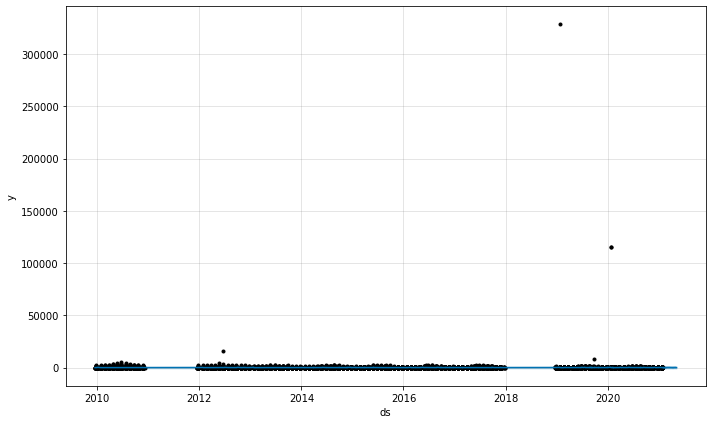

In [346]:
fig = prophetModel.plot(forecastHundredDays)

In [347]:
#plot the model forecast chart for 200 days
forecastTwoHundredDays[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2009-12-17,39.365407,-737.881777,862.331949
1,2009-12-23,59.078339,-783.000691,877.519503
2,2009-12-24,69.054009,-716.551032,860.389743
3,2009-12-25,75.615504,-750.107710,844.029618
4,2009-12-29,110.305687,-638.434043,870.418481


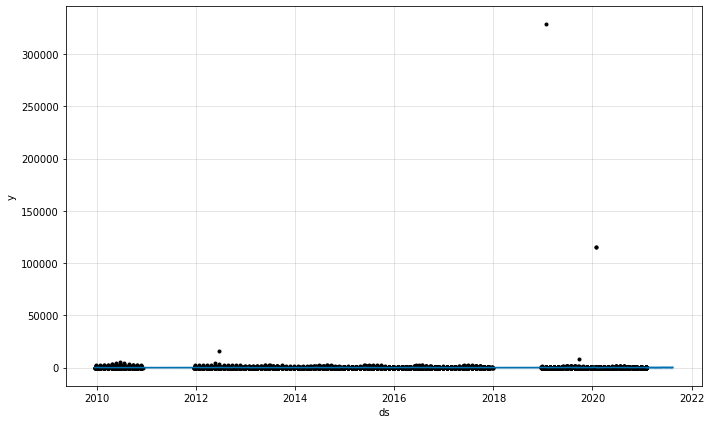

In [348]:
fig = prophetModel.plot(forecastTwoHundredDays)

In [349]:
#plot the model forecast chart for 365 days
forecast_365Days[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-12-17,39.365407,-797.107134,902.896835
1,2009-12-23,59.078339,-751.297763,888.720511
2,2009-12-24,69.054009,-700.036965,863.352092
3,2009-12-25,75.615504,-623.379651,843.291903
4,2009-12-29,110.305687,-746.364514,894.016591


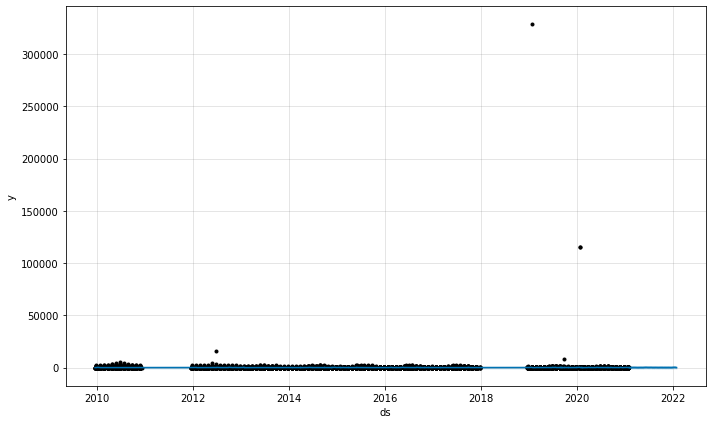

In [350]:
fig = prophetModel.plot(forecast_365Days)

Tune your FBProphet model on the following parameters:


1.   Forecasting growth:
2.   Seasonality:
3.   Trend Changepoints:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



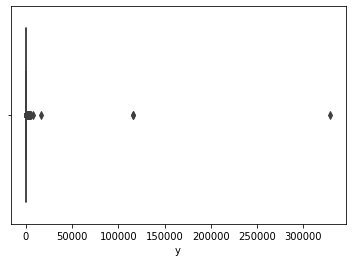

In [351]:
# import seaborn as sns
sns.boxplot(dailyTimeSeriesDf['y'])
plt.show()

In [352]:
tuned_prophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints=10,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_prophetModel.add_seasonality(name= 'daily', period=30.5, fourier_order=5, prior_scale=0.02)
dailyTimeSeriesDf['cap'] = 10000
dailyTimeSeriesDf['floor'] = 0

tuned_prophetModel.fit(dailyTimeSeriesDf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [353]:
futureHundredDaystuned = tuned_prophetModel.make_future_dataframe(periods = 100, freq = 'D')
futureHundredDaystuned['cap'] = 30000
futureHundredDaystuned['floor'] = 0
fcst_HundredDays = tuned_prophetModel.predict(futureHundredDaystuned)
fcst_HundredDays.tail()


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
683,2021-05-03,2050.048217,30000,0,1328.762441,3009.531037,2050.048205,2050.048323,86.225675,86.225675,86.225675,109.987802,109.987802,109.987802,-122.336988,-122.336988,-122.336988,98.574862,98.574862,98.574862,0.0,0.0,0.0,2136.273893
684,2021-05-04,2050.959794,30000,0,1431.743281,2979.149862,2050.959778,2050.959906,144.012115,144.012115,144.012115,135.790869,135.790869,135.790869,-107.715719,-107.715719,-107.715719,115.936966,115.936966,115.936966,0.0,0.0,0.0,2194.971909
685,2021-05-05,2051.871746,30000,0,1478.146847,3080.530219,2051.871721,2051.871864,233.670422,233.670422,233.670422,179.193380,179.193380,179.193380,-78.407914,-78.407914,-78.407914,132.884957,132.884957,132.884957,0.0,0.0,0.0,2285.542168
686,2021-05-06,2052.784073,30000,0,1544.758742,3124.919509,2052.784039,2052.784201,335.544537,335.544537,335.544537,222.523514,222.523514,222.523514,-36.015924,-36.015924,-36.015924,149.036948,149.036948,149.036948,0.0,0.0,0.0,2388.328610
687,2021-05-07,2053.696777,30000,0,1567.410626,3206.110078,2053.696741,2053.696913,354.372390,354.372390,354.372390,217.420640,217.420640,217.420640,-27.066626,-27.066626,-27.066626,164.018376,164.018376,164.018376,0.0,0.0,0.0,2408.069167


In [354]:
future_2HundredDaystuned = tuned_prophetModel.make_future_dataframe(periods = 200, freq = 'D')
future_2HundredDaystuned['cap'] = 30000
future_2HundredDaystuned['floor'] = 0
fcst_2HundredDays = tuned_prophetModel.predict(future_2HundredDaystuned)
fcst_2HundredDays.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
783,2021-08-11,2143.085817,30000,0,1193.953994,2781.733737,2143.084875,2143.086676,-162.858621,-162.858621,-162.858621,-305.875176,-305.875176,-305.875176,-78.407914,-78.407914,-78.407914,221.424470,221.424470,221.424470,0.0,0.0,0.0,1980.227196
784,2021-08-12,2144.035590,30000,0,1462.894588,3033.900887,2144.034643,2144.036474,93.004518,93.004518,93.004518,-85.935763,-85.935763,-85.935763,-36.015924,-36.015924,-36.015924,214.956205,214.956205,214.956205,0.0,0.0,0.0,2237.040107
785,2021-08-13,2144.985751,30000,0,1814.502503,3353.953188,2144.984799,2144.986674,469.099135,469.099135,469.099135,288.929515,288.929515,288.929515,-27.066626,-27.066626,-27.066626,207.236247,207.236247,207.236247,0.0,0.0,0.0,2614.084886
786,2021-08-14,2145.936301,30000,0,2334.821652,4047.554628,2145.935343,2145.937246,1061.303260,1061.303260,1061.303260,676.865060,676.865060,676.865060,185.958197,185.958197,185.958197,198.480002,198.480002,198.480002,0.0,0.0,0.0,3207.239561
787,2021-08-15,2146.887240,30000,0,2620.672673,4265.802755,2146.886276,2146.888195,1292.870272,1292.870272,1292.870272,918.373317,918.373317,918.373317,185.584975,185.584975,185.584975,188.911980,188.911980,188.911980,0.0,0.0,0.0,3439.757512


In [355]:
future_365Daystuned = tuned_prophetModel.make_future_dataframe(periods = 365, freq = 'D')
future_365Daystuned['cap'] = 30000
future_365Daystuned['floor'] = 0
fcst_365Days = tuned_prophetModel.predict(future_365Daystuned)
fcst_365Days.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
948,2022-01-23,2305.151117,30000,0,1096.056560,2742.084135,2305.146628,2305.155118,-407.174967,-407.174967,-407.174967,-500.148924,-500.148924,-500.148924,185.584975,185.584975,185.584975,-92.611019,-92.611019,-92.611019,0.0,0.0,0.0,1897.976150
949,2022-01-24,2306.166768,30000,0,877.321676,2364.983486,2306.162261,2306.170797,-633.015268,-633.015268,-633.015268,-390.363785,-390.363785,-390.363785,-122.336988,-122.336988,-122.336988,-120.314495,-120.314495,-120.314495,0.0,0.0,0.0,1673.151500
950,2022-01-25,2307.182829,30000,0,959.079552,2555.997558,2307.178305,2307.186894,-562.595460,-562.595460,-562.595460,-305.925870,-305.925870,-305.925870,-107.715719,-107.715719,-107.715719,-148.953871,-148.953871,-148.953871,0.0,0.0,0.0,1744.587369
951,2022-01-26,2308.199301,30000,0,997.637808,2535.536947,2308.194760,2308.203383,-506.130372,-506.130372,-506.130372,-249.597483,-249.597483,-249.597483,-78.407914,-78.407914,-78.407914,-178.124975,-178.124975,-178.124975,0.0,0.0,0.0,1802.068929
952,2022-01-27,2309.216183,30000,0,1069.124237,2657.840668,2309.211625,2309.220262,-445.555811,-445.555811,-445.555811,-202.136862,-202.136862,-202.136862,-36.015924,-36.015924,-36.015924,-207.403024,-207.403024,-207.403024,0.0,0.0,0.0,1863.660372


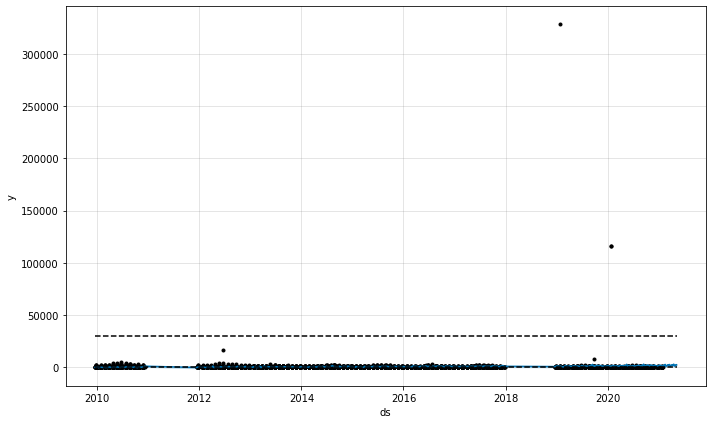

In [356]:
fig = tuned_prophetModel.plot(fcst_HundredDays)


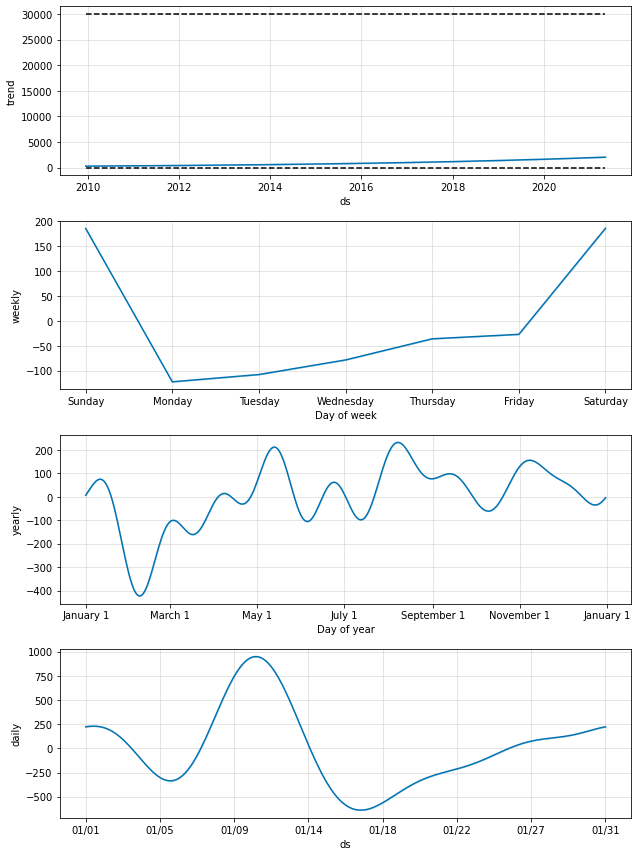

In [357]:
fig = tuned_prophetModel.plot_components(fcst_HundredDays)

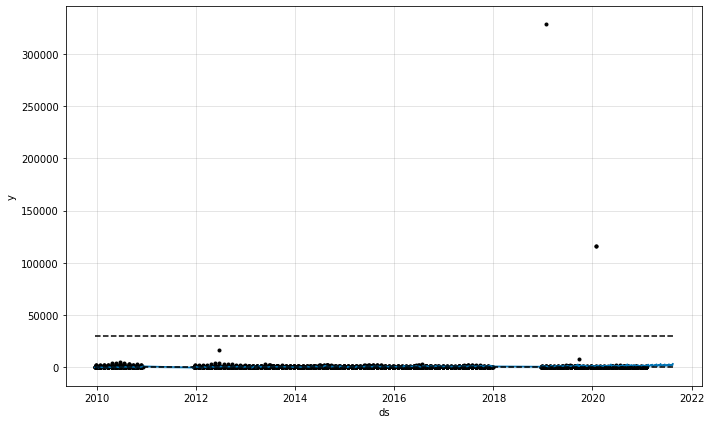

In [358]:
fig = tuned_prophetModel.plot(fcst_2HundredDays)

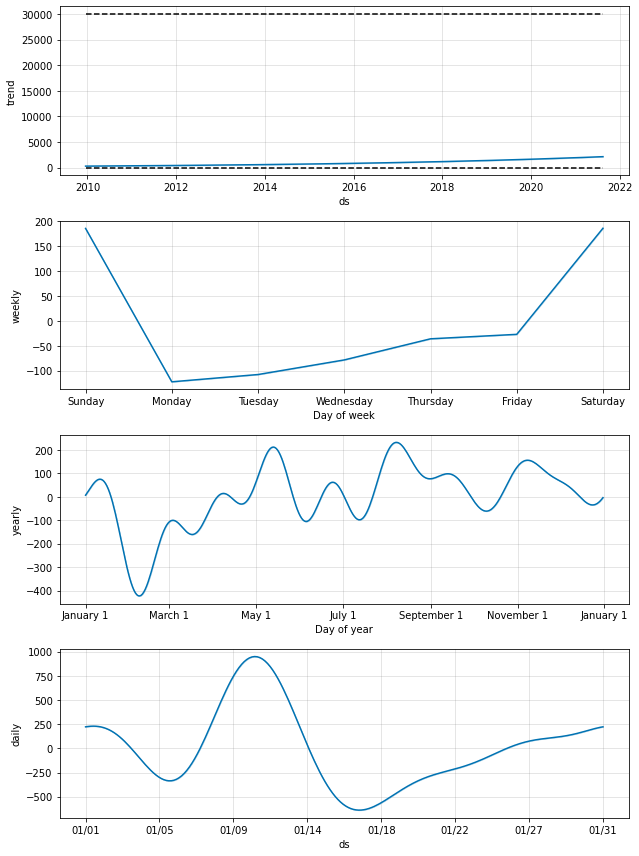

In [359]:
fig = tuned_prophetModel.plot_components(fcst_2HundredDays)

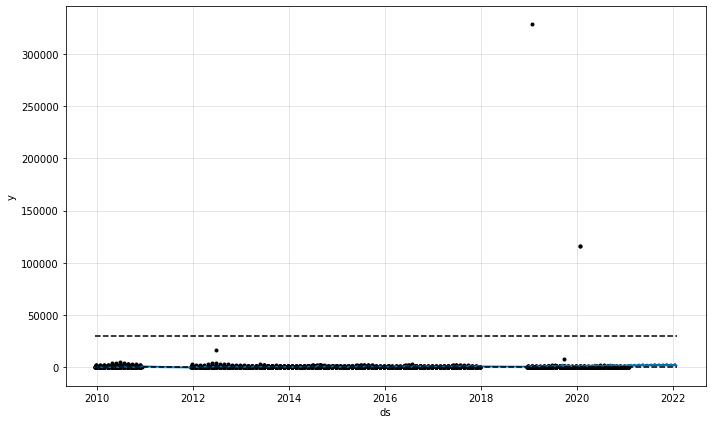

In [360]:
fig = tuned_prophetModel.plot(fcst_365Days)

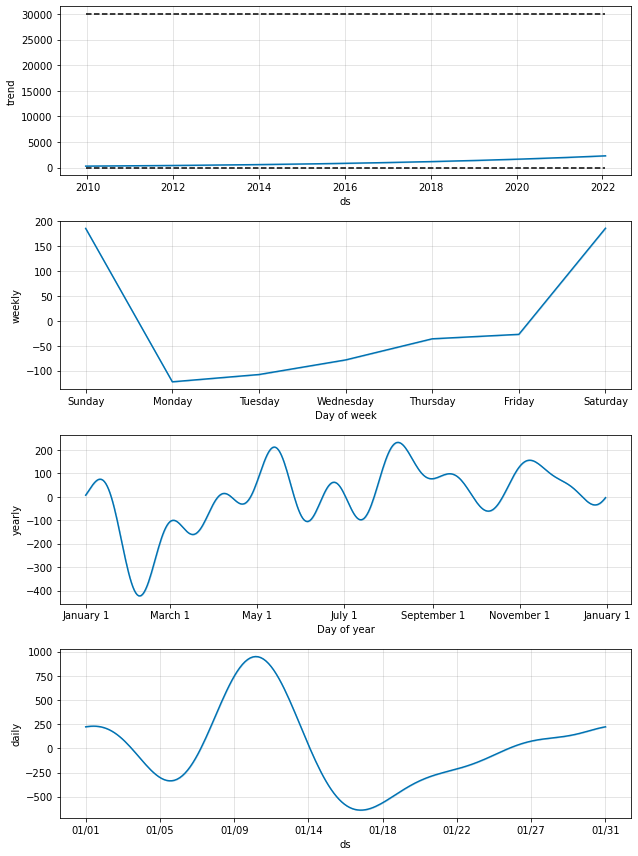

In [361]:
fig = tuned_prophetModel.plot_components(fcst_365Days)

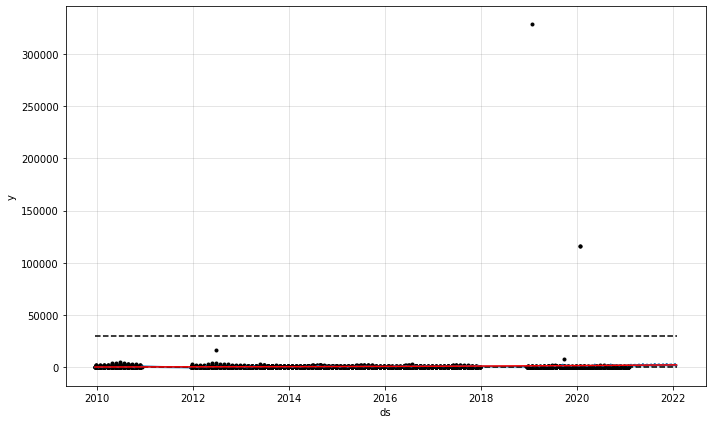

In [362]:
fig = tuned_prophetModel.plot(fcst_365Days)
a = add_changepoints_to_plot(fig.gca(), tuned_prophetModel, fcst_365Days)


**Cross Validation** 

**Evaluation** 
*   MAE (Mean Absolute Error) 
*   MAPE (Mean Absolute Percentage Error)
*   R^2 (use sklearn’s respective metrics)

Cross validation for 100 Days

In [363]:
#daily_100 = cross_validation(prophetModel, period='100 days', horizon='50 days', parallel = 'processes')
#daily_100.head()

In [364]:
# Get the performance matrix
#daily_100pm = performance_metrics(daily_100)
#daily_100pm.head()

In [365]:
# Get the _2 score

#r2_daily_score = r2_score(daily_100['y'],daily_100['yhat'])
#r2_daily_score

In [366]:
# Merge dataframes to get y in the matrix

forecastHundredDays =  forecastHundredDays.merge(dailyTimeSeriesDf, on= 'ds')
forecastTwoHundredDays = forecastTwoHundredDays.merge(dailyTimeSeriesDf, on= 'ds')
forecast_365Days = forecast_365Days.merge(dailyTimeSeriesDf, on= 'ds')


fcst_HundredDays =  fcst_HundredDays.merge(dailyTimeSeriesDf, on= 'ds')
fcst_2HundredDays = fcst_2HundredDays.merge(dailyTimeSeriesDf, on= 'ds')
fcst_365Days = fcst_365Days.merge(dailyTimeSeriesDf, on= 'ds')

In [367]:
# checking 100 days performance without parameter tuning

print('Mean absolute percentage error for 100 days forecasting:', mean_absolute_percentage_error(forecastHundredDays.y, forecastHundredDays.yhat))
print('Mean absolute error for 100 days forecasting:           ', mean_absolute_error(forecastHundredDays.y, forecastHundredDays.yhat))
print('R2 score for 100 days forecasting:                      ', r2_score(forecastHundredDays.y, forecastHundredDays.yhat))

Mean absolute percentage error for 100 days forecasting: 1.1666673627908666e+17
Mean absolute error for 100 days forecasting:            66.82975706061009
R2 score for 100 days forecasting:                       0.0006712415242345893


In [368]:
# checking 100 days performance with parameter tuning

print('Mean absolute percentage error for 100 days forecasting:', mean_absolute_percentage_error(fcst_HundredDays.y, fcst_HundredDays.yhat))
print('Mean absolute error for 100 days forecasting:           ', mean_absolute_error(fcst_HundredDays.y, fcst_HundredDays.yhat))
print('R2 score for 100 days forecasting:                      ', r2_score(fcst_HundredDays.y, fcst_HundredDays.yhat))


Mean absolute percentage error for 100 days forecasting: 1.359483789343054e+18
Mean absolute error for 100 days forecasting:            649.2284610286188
R2 score for 100 days forecasting:                       -1.3531958426491624


Ploting Actual vs Predicted

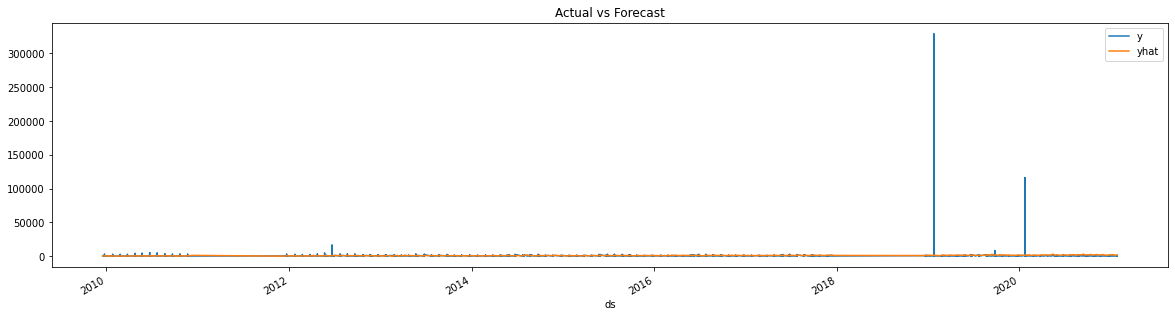

In [369]:
# plotting the actual and forecast values for 100 days

ax = (dailyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_HundredDays.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

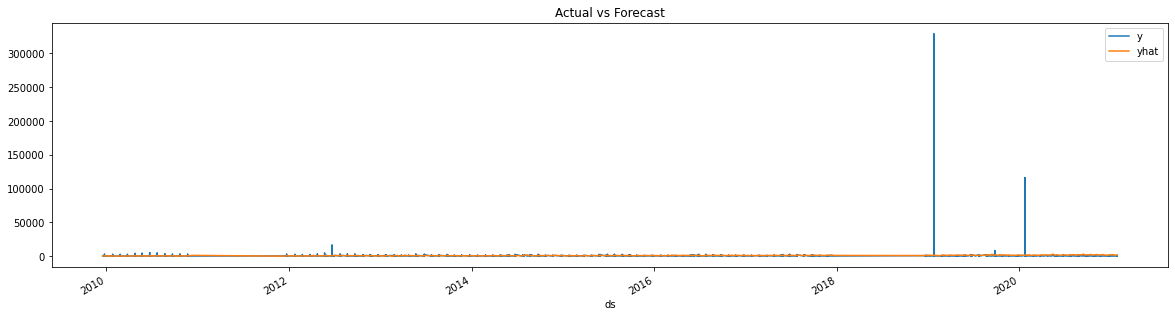

In [370]:
# plotting the actual and forecast values for 200 days

ax = (dailyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_2HundredDays.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

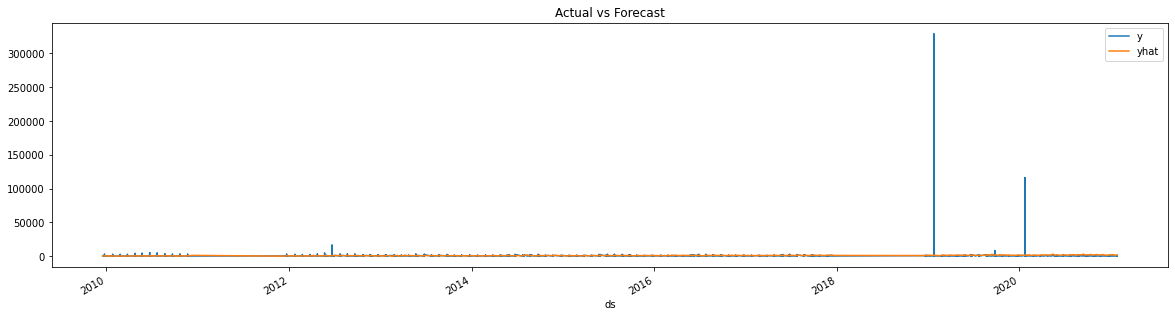

In [371]:
# plotting the actual and forecast values for 365 days

ax = (dailyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_365Days.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

### Monthly Mean data:

In [372]:
timeSeriesDf = df[['Revenue Month', 'Consumption (KW)']]
timeSeriesDf

,Revenue Month,Consumption (KW)
0,2010-01,216.00
1,2010-02,224.00
2,2010-03,216.00
3,2010-04,208.00
4,2010-05,216.00
...,...,...
362625,2021-02,109.44
362626,2021-02,141.24
362627,2021-02,0.00
362628,2021-02,0.00


#### Check for null values

In [373]:
timeSeriesDf.columns[timeSeriesDf.isnull().any()]

Index([], dtype='object')

In [374]:
timeSeriesDf.dtypes

Revenue Month        object
Consumption (KW)    float64
dtype: object

In [375]:
# Get the mean
timeSeriesDf = timeSeriesDf.groupby('Revenue Month', as_index=False)['Consumption (KW)'].mean()

In [376]:
timeSeriesDf


,Revenue Month,Consumption (KW)
0,2010-01,75.733258
1,2010-02,70.191838
2,2010-03,70.130837
3,2010-04,71.063694
4,2010-05,81.022950
...,...,...
105,2020-10,54.312617
106,2020-11,48.797600
107,2020-12,49.278783
108,2021-01,46.812793


In [377]:
# Convert date

timeSeriesDf['Revenue Month'] = pd.to_datetime(timeSeriesDf['Revenue Month'], infer_datetime_format=True)

In [378]:
timeSeriesDf

,Revenue Month,Consumption (KW)
0,2010-01-01,75.733258
1,2010-02-01,70.191838
2,2010-03-01,70.130837
3,2010-04-01,71.063694
4,2010-05-01,81.022950
...,...,...
105,2020-10-01,54.312617
106,2020-11-01,48.797600
107,2020-12-01,49.278783
108,2021-01-01,46.812793


In [379]:
timeSeriesDf.columns = ['ds', 'y']


In [380]:
timeSeriesDf

,ds,y
0,2010-01-01,75.733258
1,2010-02-01,70.191838
2,2010-03-01,70.130837
3,2010-04-01,71.063694
4,2010-05-01,81.022950
...,...,...
105,2020-10-01,54.312617
106,2020-11-01,48.797600
107,2020-12-01,49.278783
108,2021-01-01,46.812793


In [381]:
timeSeriesDf.describe()

,y
count,110.000000
mean,65.644005
std,18.166664
min,45.636254
25%,51.188663
50%,59.850966
75%,77.538827
max,152.218906


In [382]:
#timeSeriesDf.plot()
timeSeriesDf.head()

,ds,y
0,2010-01-01,75.733258
1,2010-02-01,70.191838
2,2010-03-01,70.130837
3,2010-04-01,71.063694
4,2010-05-01,81.022950


In [383]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Monthly Electricity consumption(KW)', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    



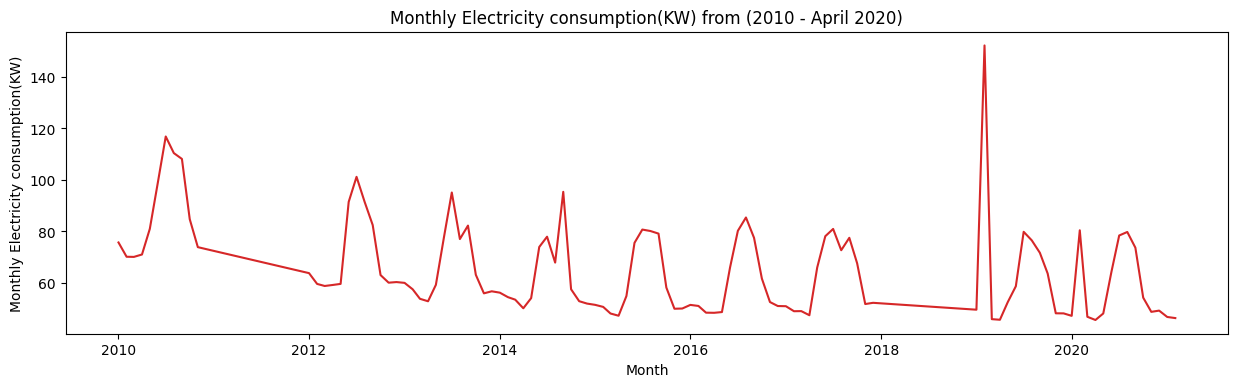

In [384]:
plot_df(timeSeriesDf, x=timeSeriesDf['ds'], y=timeSeriesDf['y'], title='Monthly Electricity consumption(KW) from (2010 - April 2020)')


**FaceBook Prophet Model for monthly**




**Predict the EC for 1/6/9 months into the future.**

In [385]:
### FaceBook Prophet

prophetModel = Prophet()
prophetModel = prophetModel.fit(timeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [386]:

# Predicting values for future a month

futureOneMonth = prophetModel.make_future_dataframe(1, freq = 'M')
forecastOneMonth = prophetModel.predict(futureOneMonth)
forecastOneMonth.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2020-11-01,60.267734,37.443359,63.513750,60.267734,60.267734,-10.699215,-10.699215,-10.699215,-10.699215,-10.699215,-10.699215,0.0,0.0,0.0,49.568519
107,2020-12-01,60.214233,36.742198,63.317180,60.214233,60.214233,-10.581210,-10.581210,-10.581210,-10.581210,-10.581210,-10.581210,0.0,0.0,0.0,49.633023
108,2021-01-01,60.158948,36.650249,62.729480,60.158948,60.158948,-11.091247,-11.091247,-11.091247,-11.091247,-11.091247,-11.091247,0.0,0.0,0.0,49.067701
109,2021-02-01,60.103664,43.941246,71.711761,60.103664,60.103664,-2.539019,-2.539019,-2.539019,-2.539019,-2.539019,-2.539019,0.0,0.0,0.0,57.564645
110,2021-02-28,60.055513,28.601054,54.375939,60.055513,60.055513,-18.678155,-18.678155,-18.678155,-18.678155,-18.678155,-18.678155,0.0,0.0,0.0,41.377358


In [387]:
# Predicting values for future 6 months 

futureSixMonth = prophetModel.make_future_dataframe( 6, freq = 'M')
forecastSixMonth = prophetModel.predict(futureSixMonth)
forecastSixMonth.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
111,2021-03-31,60.000228,29.878801,55.817549,59.995590,60.003402,-17.316494,-17.316494,-17.316494,-17.316494,-17.316494,-17.316494,0.0,0.0,0.0,42.683734
112,2021-04-30,59.946727,39.214173,66.169018,59.934384,59.959808,-7.395158,-7.395158,-7.395158,-7.395158,-7.395158,-7.395158,0.0,0.0,0.0,52.551569
113,2021-05-31,59.891442,55.078065,83.795399,59.867484,59.918174,8.947419,8.947419,8.947419,8.947419,8.947419,8.947419,0.0,0.0,0.0,68.838861
114,2021-06-30,59.837941,67.685210,94.921523,59.801093,59.879397,21.157985,21.157985,21.157985,21.157985,21.157985,21.157985,0.0,0.0,0.0,80.995926
115,2021-07-31,59.782656,60.699331,88.849632,59.729633,59.842069,15.160554,15.160554,15.160554,15.160554,15.160554,15.160554,0.0,0.0,0.0,74.943210


In [388]:
# Predicting values for future 9 months 

futureNineMonths = prophetModel.make_future_dataframe(periods = 9, freq = 'M')
forecastNineMonths = prophetModel.predict(futureNineMonths)
forecastNineMonths.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
114,2021-06-30,59.837941,67.314251,94.762156,59.800651,59.879814,21.157985,21.157985,21.157985,21.157985,21.157985,21.157985,0.0,0.0,0.0,80.995926
115,2021-07-31,59.782656,62.687537,88.574201,59.723300,59.842444,15.160554,15.160554,15.160554,15.160554,15.160554,15.160554,0.0,0.0,0.0,74.943210
116,2021-08-31,59.727372,64.844393,91.584440,59.647320,59.803462,18.492456,18.492456,18.492456,18.492456,18.492456,18.492456,0.0,0.0,0.0,78.219828
117,2021-09-30,59.673870,45.022420,72.465879,59.570021,59.767335,-1.803346,-1.803346,-1.803346,-1.803346,-1.803346,-1.803346,0.0,0.0,0.0,57.870525
118,2021-10-31,59.618586,34.628830,60.415114,59.495929,59.738122,-12.135137,-12.135137,-12.135137,-12.135137,-12.135137,-12.135137,0.0,0.0,0.0,47.483449


In [389]:
#plot the model forecast chart 
forecastOneMonth[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,72.106649,57.850087,85.747209
1,2010-02-01,82.661961,69.760271,96.562997
2,2010-03-01,67.622439,54.207933,81.207725
3,2010-04-01,66.941778,54.688194,80.982319
4,2010-05-01,73.698609,60.897508,86.637367


In [390]:
#plot the model forecast chart 
forecastSixMonth[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,72.106649,58.924783,86.115272
1,2010-02-01,82.661961,69.823645,95.910354
2,2010-03-01,67.622439,53.888810,80.908075
3,2010-04-01,66.941778,54.457422,80.022868
4,2010-05-01,73.698609,60.186201,87.512801


In [391]:
#plot the model forecast chart 
forecastNineMonths[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,72.106649,58.003841,86.312977
1,2010-02-01,82.661961,69.473422,96.512002
2,2010-03-01,67.622439,55.314828,80.674470
3,2010-04-01,66.941778,53.434029,80.189751
4,2010-05-01,73.698609,60.444903,87.041917


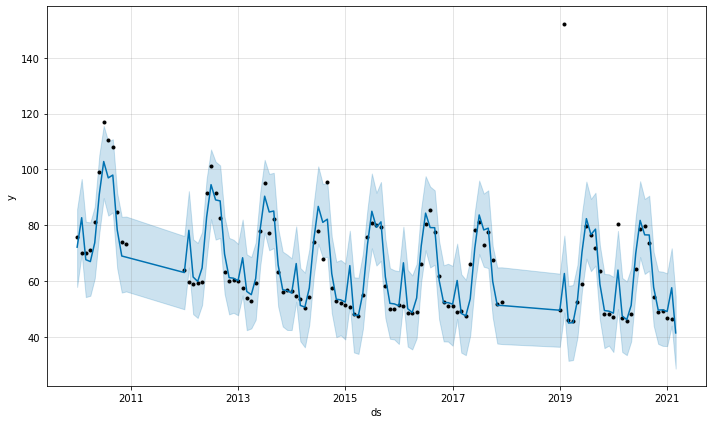

In [392]:
fig = prophetModel.plot(forecastOneMonth)

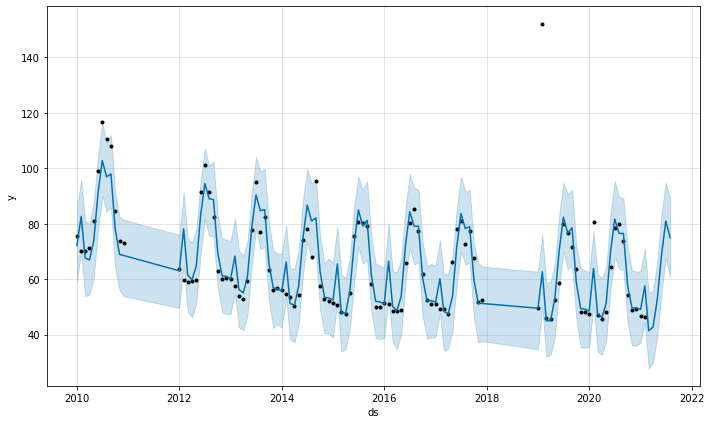

In [393]:
fig = prophetModel.plot(forecastSixMonth)

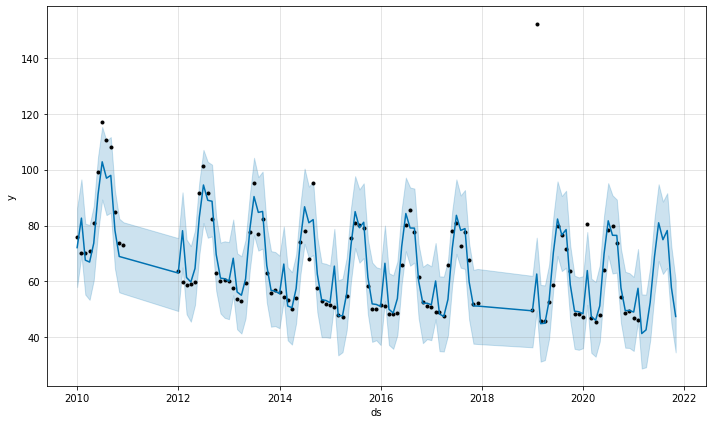

In [394]:
fig1 =prophetModel.plot(forecastNineMonths)

**Checking the trends in the data**

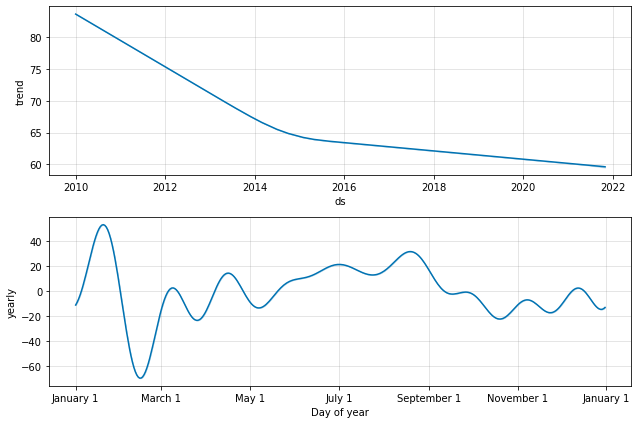

In [395]:
fig = prophetModel.plot_components(forecastNineMonths)

**Tune your FBProphet model on the following parameters:**


*   Forecasting growth:
*   Seasonality:
*  Trend Changepoints: 





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



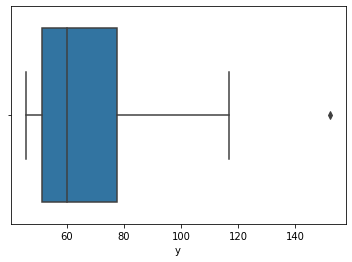

In [396]:
sns.boxplot(timeSeriesDf['y'])
plt.show()

In [397]:
tuned_prophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints=10,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_prophetModel.add_seasonality(name= 'monthly', period=30.5, fourier_order=5, prior_scale=0.02)
timeSeriesDf['cap'] = 70

tuned_prophetModel.fit(timeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [398]:
futureOneMonthtuned = tuned_prophetModel.make_future_dataframe(periods = 9, freq = 'M')
futureOneMonthtuned['cap'] = 70
fcst_one_monthtuned = tuned_prophetModel.predict(futureOneMonthtuned)
fcst_one_monthtuned[['yhat','yhat_lower','yhat_upper']].tail()

,yhat,yhat_lower,yhat_upper
114,77.576936,64.237782,91.979884
115,68.718704,54.560688,82.110553
116,77.317217,64.418783,90.554206
117,54.747563,41.503654,67.525288
118,37.430704,23.397417,50.809105


In [399]:
futureSixMonthstuned = tuned_prophetModel.make_future_dataframe(periods = 9, freq = 'M')
futureSixMonthstuned['cap'] = 70
fcstSixMonthstuned = tuned_prophetModel.predict(futureSixMonthstuned)
fcstSixMonthstuned[['yhat','yhat_lower','yhat_upper']].tail()


,yhat,yhat_lower,yhat_upper
114,77.576936,64.478374,90.735220
115,68.718704,55.354458,83.329503
116,77.317217,63.104266,91.579305
117,54.747563,42.524206,67.813028
118,37.430704,25.205303,50.073327


In [400]:

futureNineMonthstuned = tuned_prophetModel.make_future_dataframe(periods = 9, freq = 'M')
futureNineMonthstuned['cap'] = 70
fcstNineMonthstuned = tuned_prophetModel.predict(futureNineMonthstuned)
fcstNineMonthstuned[['yhat','yhat_lower','yhat_upper']].tail()



,yhat,yhat_lower,yhat_upper
114,77.576936,64.548532,90.899497
115,68.718704,55.599232,81.175819
116,77.317217,63.466970,91.081084
117,54.747563,41.740995,67.422739
118,37.430704,24.743886,51.237470


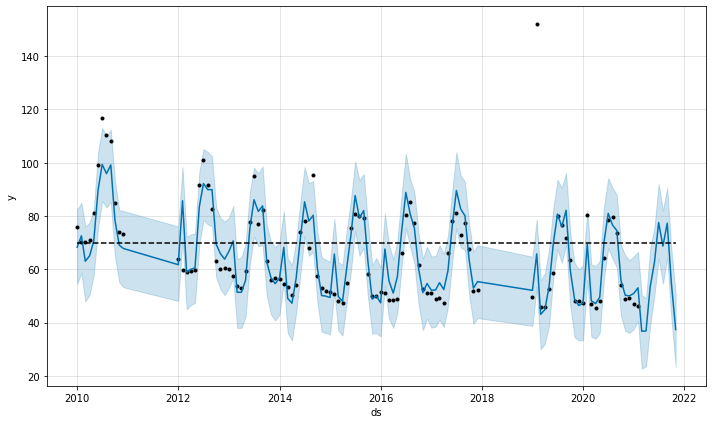

In [401]:
fig = tuned_prophetModel.plot(fcst_one_monthtuned)


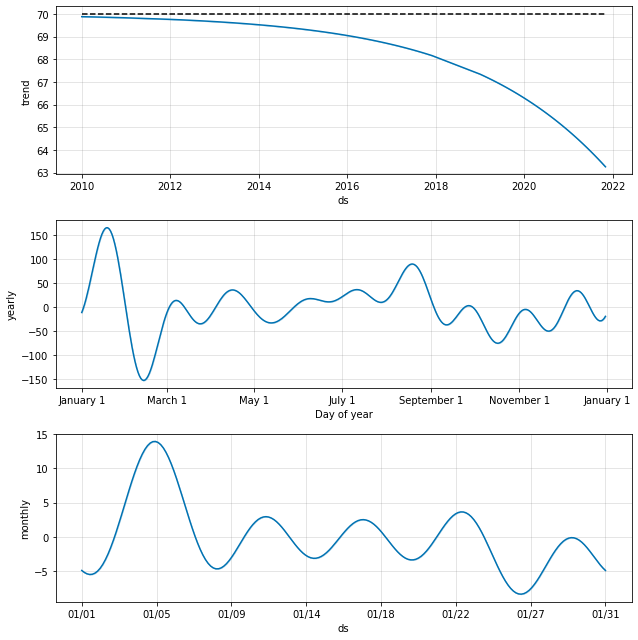

In [402]:
fig = tuned_prophetModel.plot_components(fcst_one_monthtuned)

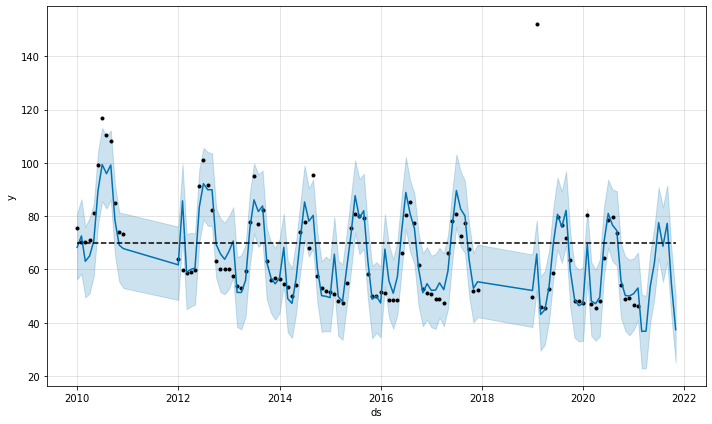

In [403]:
fig = tuned_prophetModel.plot(fcstSixMonthstuned)

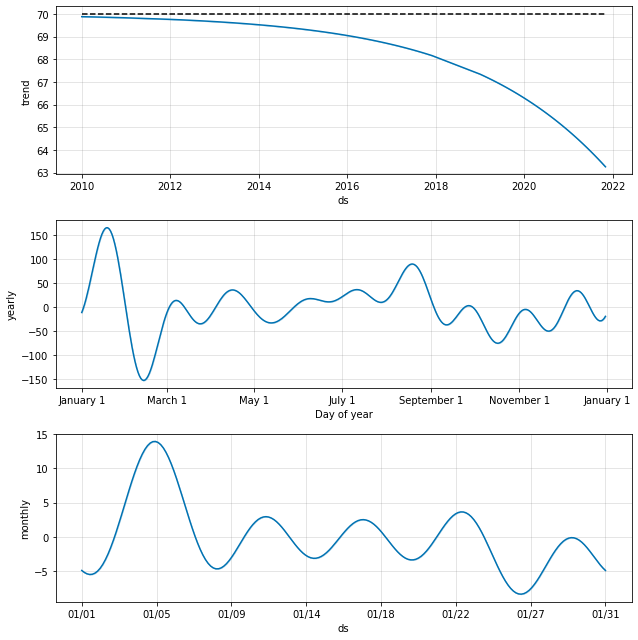

In [404]:
fig = tuned_prophetModel.plot_components(fcstSixMonthstuned)

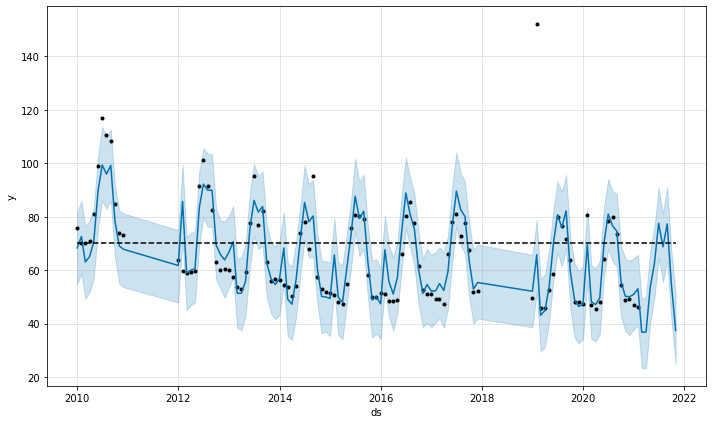

In [405]:
fig = tuned_prophetModel.plot(fcstNineMonthstuned)

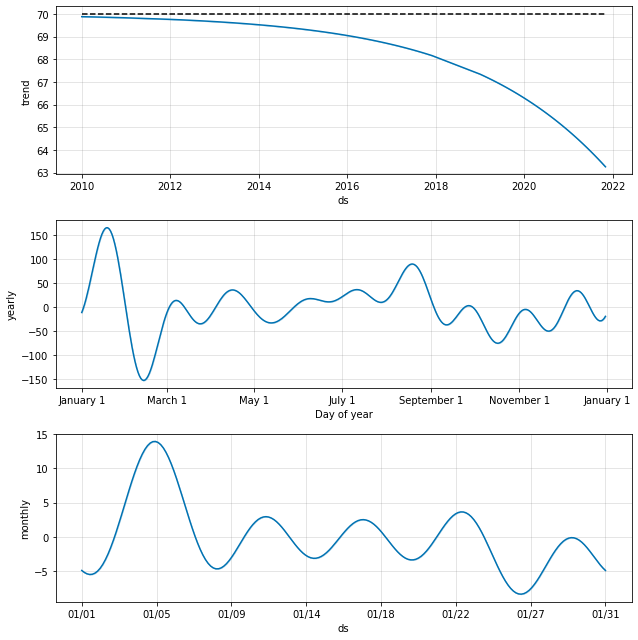

In [406]:
fig = tuned_prophetModel.plot_components(fcstNineMonthstuned)

**Cross Validation** 

**Evaluation** 
*   MAE (Mean Absolute Error) 
*   MAPE (Mean Absolute Percentage Error)
*   R^2 (use sklearn’s respective metrics)






In [407]:
#def get_cross_validation(prophetModel):
#   estimated_consumption = cross_validation(prophetModel, initial='960 days',period='135 days', horizon='273 days', parallel = 'processes')
#   get_performance_metrics(estimated_consumption)
#  get_r2_score(estimated_consumption)
#  estimated_consumption.head() 


In [408]:
#def get_performance_metrics(estimated_consumption):
#   performance_matrix = performance_metrics(estimated_consumption)
#  performance_matrix.head()


In [409]:
#def get_r2_score(estimated_consumption):
#   r2_mn = r2_score(estimated_consumption['y'],estimated_consumption['yhat'])
#  print(r2_mn)


In [410]:
# get_cross_validation(tuned_prophetModel)

In [411]:
#monthly_pm = performance_metrics(monthly_ES)
#monthly_pm.head()

In [412]:
#r2_mn = r2_score(monthly_ES['y'],monthly_ES['yhat'])
#r2_mn

In [413]:
# Merge dataframes to get y in the matrix

forecastOneMonth =  forecastOneMonth.merge(timeSeriesDf, on= 'ds')
forecastSixMonth = forecastSixMonth.merge(timeSeriesDf, on= 'ds')
forecastNineMonths = forecastNineMonths.merge(timeSeriesDf, on= 'ds')

fcst_one_monthtuned = fcst_one_monthtuned.merge(timeSeriesDf, on= 'ds')
fcstSixMonthstuned = fcstSixMonthstuned.merge(timeSeriesDf, on= 'ds')
fcstNineMonthstuned = fcstNineMonthstuned.merge(timeSeriesDf, on= 'ds')



In [414]:
# checking one month performance without parameter tuning

print('Mean absolute percentage error for 1 month forecasting:', mean_absolute_percentage_error(forecastOneMonth.y, forecastOneMonth.yhat))
print('Mean absolute error for 1 month forecasting:           ', mean_absolute_error(forecastOneMonth.y, forecastOneMonth.yhat))
print('R2 score for 1 month forecasting:                      ', r2_score(forecastOneMonth.y, forecastOneMonth.yhat))


Mean absolute percentage error for 1 month forecasting: 0.06810392846745533
Mean absolute error for 1 month forecasting:            5.027691591954126
R2 score for 1 month forecasting:                       0.6642014395955875


In [415]:
# checking one month performance with parameter tuning

print('Mean absolute percentage error for 1 month forecasting:', mean_absolute_percentage_error(fcst_one_monthtuned.y, fcst_one_monthtuned.yhat))
print('Mean absolute error for 1 month forecasting:           ', mean_absolute_error(fcst_one_monthtuned.y, fcst_one_monthtuned.yhat))
print('R2 score for 1 month forecasting:                      ', r2_score(fcst_one_monthtuned.y, fcst_one_monthtuned.yhat))


Mean absolute percentage error for 1 month forecasting: 0.07855529529227619
Mean absolute error for 1 month forecasting:            5.6241443864197365
R2 score for 1 month forecasting:                       0.658919529908282


In [416]:
# checking six months performance without parameter tuning

print('Mean absolute percentage error for six months forecasting:', mean_absolute_percentage_error(forecastSixMonth.y, forecastSixMonth.yhat))
print('Mean absolute error for six months forecasting:           ', mean_absolute_error(forecastSixMonth.y, forecastSixMonth.yhat))
print('R2 score for six months forecasting:                      ', r2_score(forecastSixMonth.y, forecastSixMonth.yhat))



Mean absolute percentage error for six months forecasting: 0.06810392846745533
Mean absolute error for six months forecasting:            5.027691591954126
R2 score for six months forecasting:                       0.6642014395955875


In [417]:
# checking six month performance with parameter tuning

print('Mean absolute percentage error for 6 months forecasting:', mean_absolute_percentage_error(fcstSixMonthstuned.y, fcst_one_monthtuned.yhat))
print('Mean absolute error for 6 months forecasting:           ', mean_absolute_error(fcstSixMonthstuned.y, fcstSixMonthstuned.yhat))
print('R2 score for 6 months forecasting:                      ', r2_score(fcstSixMonthstuned.y, fcstNineMonthstuned.yhat))


Mean absolute percentage error for 6 months forecasting: 0.07855529529227619
Mean absolute error for 6 months forecasting:            5.6241443864197365
R2 score for 6 months forecasting:                       0.658919529908282


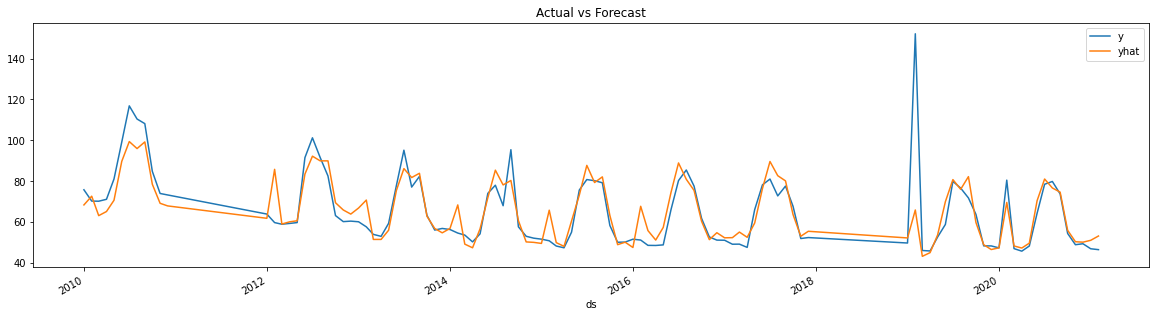

In [418]:
# plotting the actual and forecast values for one month

ax = (timeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_one_monthtuned.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

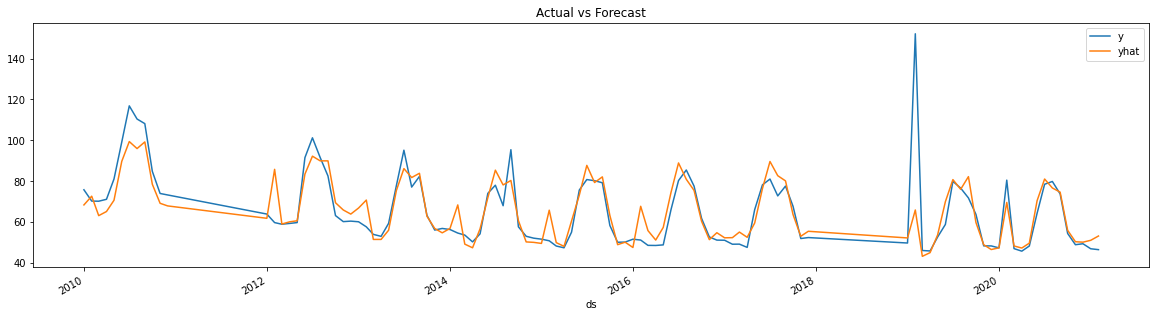

In [419]:
# plotting the actual and forecast values for six months

ax = (timeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcstSixMonthstuned.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

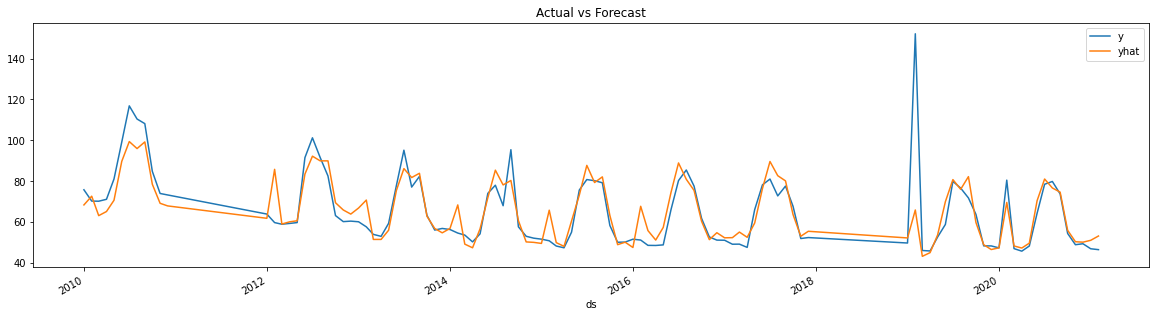

In [420]:
# plotting the actual and forecast values for nine months

ax = (timeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcstNineMonthstuned.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

### Yearly Mean data:

In [150]:
yearlyTimeSeriesDf = df[['Revenue Month', 'Consumption (KW)']]
yearlyTimeSeriesDf

,Revenue Month,Consumption (KW)
0,2010-01,216.00
1,2010-02,224.00
2,2010-03,216.00
3,2010-04,208.00
4,2010-05,216.00
...,...,...
362625,2021-02,109.44
362626,2021-02,141.24
362627,2021-02,0.00
362628,2021-02,0.00


In [151]:
# Get yearly mean data
yearlyTimeSeriesDf = yearlyTimeSeriesDf.groupby(pd.PeriodIndex(yearlyTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [152]:
# Generate date for the years
yearlyTimeSeriesDf['Revenue Month'] = yearlyTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [153]:
yearlyTimeSeriesDf.shape

(10, 2)

In [154]:
yearlyTimeSeriesDf.columns = ['ds', 'y']
yearlyTimeSeriesDf.head()

,ds,y
0,2010-01-01,86.330025
1,2012-01-01,71.050691
2,2013-01-01,66.071398
3,2014-01-01,62.291844
4,2015-01-01,60.617893


In [155]:
# Check for null values
yearlyTimeSeriesDf.columns[yearlyTimeSeriesDf.isnull().any()]

Index([], dtype='object')

**FaceBook Prophet Model for Yearly data**

**Predict the EC for 1/10/20 yeras into the future.**

In [156]:
# Instantiate prophet model
prophetModel = Prophet()
prophetModel = prophetModel.fit(yearlyTimeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [157]:

# Predicting values for future 1 year

futureOneYear = prophetModel.make_future_dataframe(1, freq = 'Y')
forecastOneYear = prophetModel.predict(futureOneYear)
forecastOneYear.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6,2017-01-01,-44.042367,52.133423,65.933810,-44.042367,-44.042367,103.477644,103.477644,103.477644,103.477644,103.477644,103.477644,0.0,0.0,0.0,59.435276
7,2019-01-01,-48.581655,50.672105,64.426067,-48.581655,-48.581655,105.916393,105.916393,105.916393,105.916393,105.916393,105.916393,0.0,0.0,0.0,57.334738
8,2020-01-01,-50.851300,48.606435,61.931767,-50.851300,-50.851300,106.090564,106.090564,106.090564,106.090564,106.090564,106.090564,0.0,0.0,0.0,55.239264
9,2021-01-01,-53.127162,43.172212,57.306989,-53.127162,-53.127162,103.477644,103.477644,103.477644,103.477644,103.477644,103.477644,0.0,0.0,0.0,50.350482
10,2021-12-31,-55.390588,41.836036,56.225513,-55.390588,-55.390588,104.349190,104.349190,104.349190,104.349190,104.349190,104.349190,0.0,0.0,0.0,48.958602


In [158]:
# Predicting values for future 10 year

futureTenYear = prophetModel.make_future_dataframe(10, freq = 'Y')
forecastTenYear = prophetModel.predict(futureTenYear)
forecastTenYear.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2026-12-31,-66.745027,28.927481,42.536182,-66.745028,-66.745026,102.437486,102.437486,102.437486,102.437486,102.437486,102.437486,0.0,0.0,0.0,35.692459
16,2027-12-31,-69.014671,23.617626,37.538857,-69.014672,-69.014670,99.836303,99.836303,99.836303,99.836303,99.836303,99.836303,0.0,0.0,0.0,30.821632
17,2028-12-31,-71.290533,27.280868,41.029230,-71.290535,-71.290532,105.567720,105.567720,105.567720,105.567720,105.567720,105.567720,0.0,0.0,0.0,34.277187
18,2029-12-31,-73.560177,24.119526,37.839433,-73.560180,-73.560175,104.349190,104.349190,104.349190,104.349190,104.349190,104.349190,0.0,0.0,0.0,30.789012
19,2030-12-31,-75.829822,19.688995,33.756114,-75.829824,-75.829819,102.437486,102.437486,102.437486,102.437486,102.437486,102.437486,0.0,0.0,0.0,26.607664


In [159]:
# Predicting values for future 20 year

futureTwentyYear = prophetModel.make_future_dataframe(20, freq = 'Y')
forecastTwentyYear = prophetModel.predict(futureTwentyYear)
forecastTwentyYear.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25,2036-12-31,-89.460123,9.654182,23.063686,-89.460128,-89.460118,105.567720,105.567720,105.567720,105.567720,105.567720,105.567720,0.0,0.0,0.0,16.107597
26,2037-12-31,-91.729767,5.679861,19.479932,-91.729772,-91.729761,104.349190,104.349190,104.349190,104.349190,104.349190,104.349190,0.0,0.0,0.0,12.619423
27,2038-12-31,-93.999411,1.334931,15.021525,-93.999417,-93.999405,102.437486,102.437486,102.437486,102.437486,102.437486,102.437486,0.0,0.0,0.0,8.438075
28,2039-12-31,-96.269055,-2.949125,10.576679,-96.269062,-96.269049,99.836303,99.836303,99.836303,99.836303,99.836303,99.836303,0.0,0.0,0.0,3.567248
29,2040-12-31,-98.544917,0.565730,13.876284,-98.544924,-98.544910,105.567720,105.567720,105.567720,105.567720,105.567720,105.567720,0.0,0.0,0.0,7.022803


In [160]:
#plot the model forecast chart 
forecastOneYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,76.902648,70.409390,84.006535
1,2012-01-01,73.408854,66.352061,80.838671
2,2013-01-01,68.520071,61.523211,75.253543
3,2014-01-01,67.817853,60.862688,75.011220
4,2015-01-01,66.419532,60.141122,73.149516


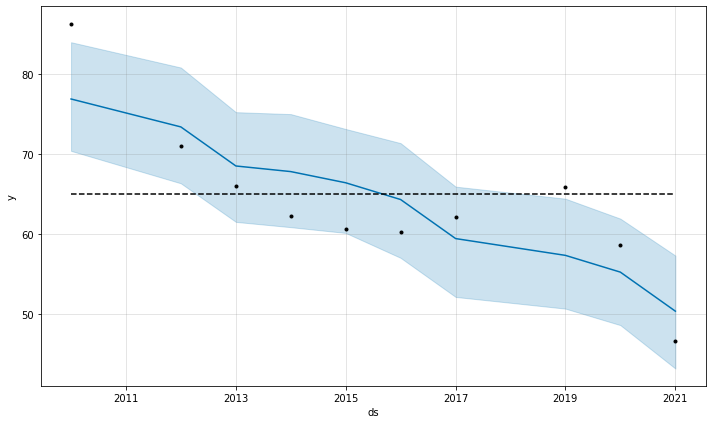

In [194]:
fig = prophetModel.plot(forecastOneYear)

In [162]:
#plot the model forecast chart 
forecastTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,76.902648,70.189356,83.570122
1,2012-01-01,73.408854,66.711960,80.528274
2,2013-01-01,68.520071,61.614224,75.120150
3,2014-01-01,67.817853,60.561972,74.651560
4,2015-01-01,66.419532,59.324771,73.346285


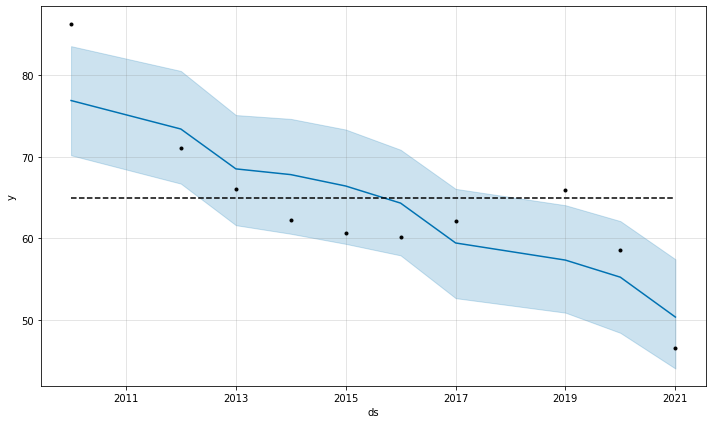

In [195]:
fig = prophetModel.plot(forecastTenYear)

In [164]:
#plot the model forecast chart 
forecastTwentyYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,76.902648,69.766500,83.450688
1,2012-01-01,73.408854,66.566133,80.572940
2,2013-01-01,68.520071,61.739561,75.519608
3,2014-01-01,67.817853,60.965465,74.527772
4,2015-01-01,66.419532,59.629943,72.823895


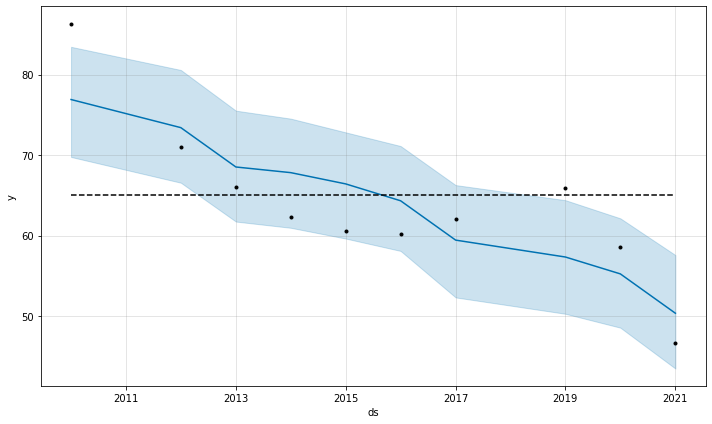

In [196]:
fig = prophetModel.plot(forecastTwentyYear)

**Checking the trends in the data**

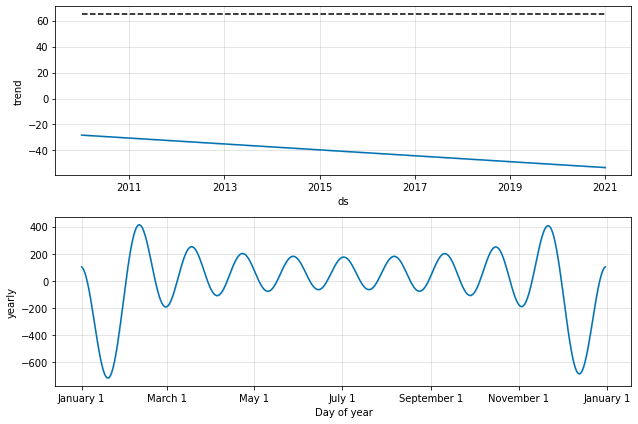

In [197]:
# Trends for one year
fig = prophetModel.plot_components(forecastOneYear)

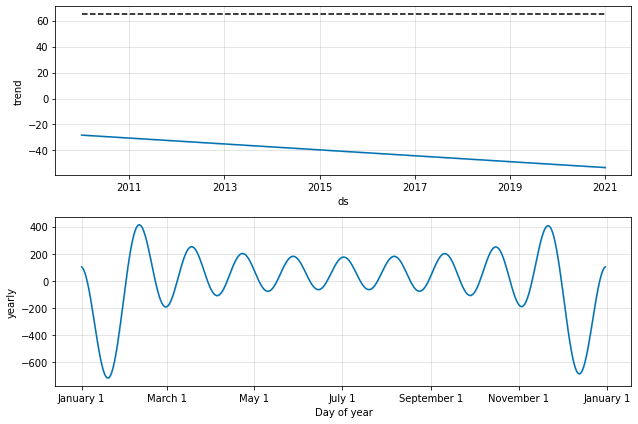

In [198]:
# Trends for 10 years
fig =prophetModel.plot_components(forecastTenYear)

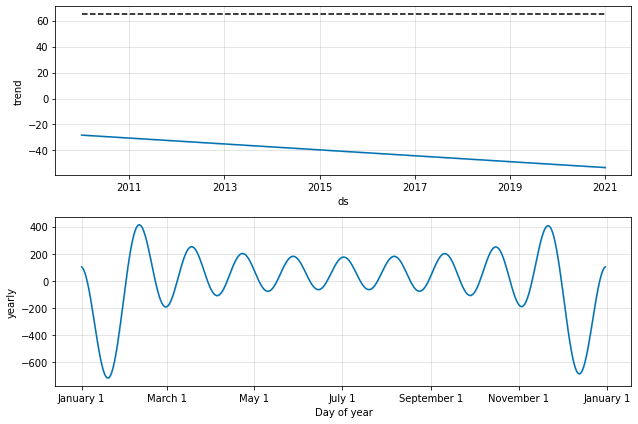

In [223]:
# Trends for 20 years
fig = prophetModel.plot_components(forecastTwentyYear)

Tune your FBProphet model on the following parameters:
* Forecasting growth:
* Seasonality:
* Trend Changepoints:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



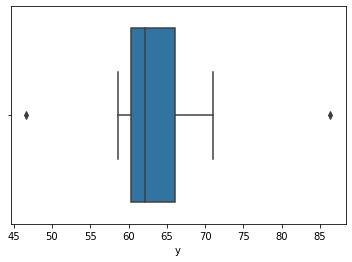

In [172]:
# Getting outliers to decide cap value

sns.boxplot(yearlyTimeSeriesDf['y'])
plt.show()

In [173]:
cap = 65

In [174]:
tuned_prophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints=10,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_prophetModel.add_seasonality(name= 'yearly', period=30.5, fourier_order=5, prior_scale=0.02)
yearlyTimeSeriesDf['cap'] = cap

In [175]:
tuned_prophetModel.fit(yearlyTimeSeriesDf)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [176]:
futureOneYearTuned = tuned_prophetModel.make_future_dataframe(periods = 1, freq = 'Y')
futureOneYearTuned['cap'] = cap
fcst_OneYear = tuned_prophetModel.predict(futureOneYearTuned)
fcst_OneYear.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6,2017-01-01,63.682466,65,56.561326,65.935838,63.682466,63.682466,-2.298416,-2.298416,-2.298416,-2.298416,-2.298416,-2.298416,0.0,0.0,0.0,61.384050
7,2019-01-01,59.752846,65,58.323755,67.376526,59.752846,59.752846,3.081022,3.081022,3.081022,3.081022,3.081022,3.081022,0.0,0.0,0.0,62.833868
8,2020-01-01,55.042021,65,52.030053,61.286739,55.042021,55.042021,1.647640,1.647640,1.647640,1.647640,1.647640,1.647640,0.0,0.0,0.0,56.689661
9,2021-01-01,47.325602,65,44.198240,53.584922,47.325602,47.325602,1.647640,1.647640,1.647640,1.647640,1.647640,1.647640,0.0,0.0,0.0,48.973242
10,2021-12-31,36.766954,65,29.368613,38.468402,36.766950,36.766959,-2.923881,-2.923881,-2.923881,-2.923881,-2.923881,-2.923881,0.0,0.0,0.0,33.843074


In [178]:
futureTenYearsTuned = tuned_prophetModel.make_future_dataframe(periods = 10, freq = 'Y')
futureTenYearsTuned['cap'] = cap
fcst_TenYears = tuned_prophetModel.predict(futureTenYearsTuned)
fcst_TenYears.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2026-12-31,2.199113,65,-3.447927,5.683939,2.199096,2.199128,-0.996777,-0.996777,-0.996777,-0.996777,-0.996777,-0.996777,0.0,0.0,0.0,1.202336
16,2027-12-31,1.086335,65,-5.866057,3.734137,1.086325,1.086345,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,0.0,0.0,0.0,-1.130549
17,2028-12-31,0.530824,65,-6.356469,2.680336,0.530818,0.530830,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,0.0,0.0,0.0,-1.686060
18,2029-12-31,0.258743,65,-6.654154,2.169522,0.258739,0.258746,-2.433491,-2.433491,-2.433491,-2.433491,-2.433491,-2.433491,0.0,0.0,0.0,-2.174748
19,2030-12-31,0.125848,65,-5.795057,3.574941,0.125846,0.125850,-1.424788,-1.424788,-1.424788,-1.424788,-1.424788,-1.424788,0.0,0.0,0.0,-1.298940


In [179]:
futureTwentyYearsTuned = tuned_prophetModel.make_future_dataframe(periods = 10, freq = 'Y')
futureTwentyYearsTuned['cap'] = cap
fcst_TwentyYears = tuned_prophetModel.predict(futureTwentyYearsTuned)
fcst_TwentyYears.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2026-12-31,2.199113,65,-3.607321,5.839771,2.199097,2.199131,-0.996777,-0.996777,-0.996777,-0.996777,-0.996777,-0.996777,0.0,0.0,0.0,1.202336
16,2027-12-31,1.086335,65,-5.514398,3.404116,1.086325,1.086347,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,0.0,0.0,0.0,-1.130549
17,2028-12-31,0.530824,65,-5.966901,2.512165,0.530818,0.530831,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,-2.216884,0.0,0.0,0.0,-1.686060
18,2029-12-31,0.258743,65,-6.674385,2.436456,0.258739,0.258747,-2.433491,-2.433491,-2.433491,-2.433491,-2.433491,-2.433491,0.0,0.0,0.0,-2.174748
19,2030-12-31,0.125848,65,-6.276890,3.429255,0.125846,0.125851,-1.424788,-1.424788,-1.424788,-1.424788,-1.424788,-1.424788,0.0,0.0,0.0,-1.298940


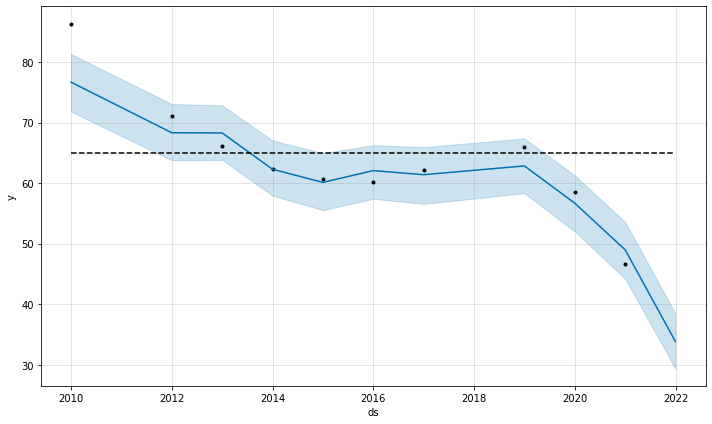

In [180]:
fig = tuned_prophetModel.plot(fcst_OneYear)

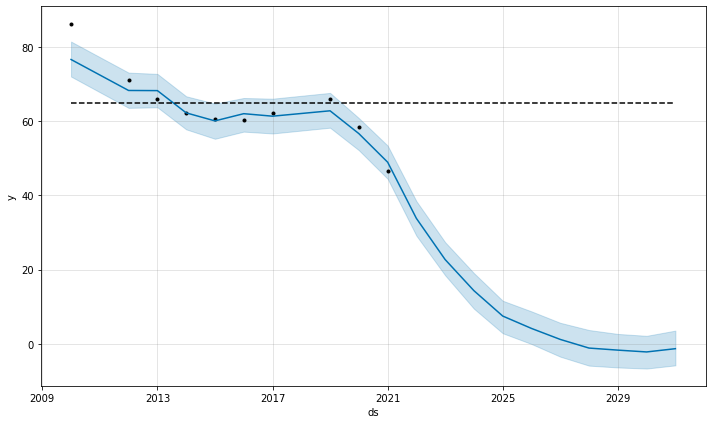

In [183]:
fig = tuned_prophetModel.plot(fcst_TenYears)

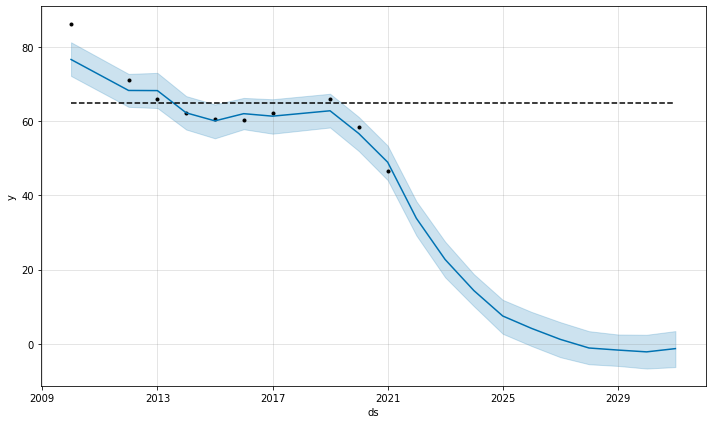

In [182]:
fig = tuned_prophetModel.plot(fcst_TwentyYears)

Changing the changepoint_prior_scale

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


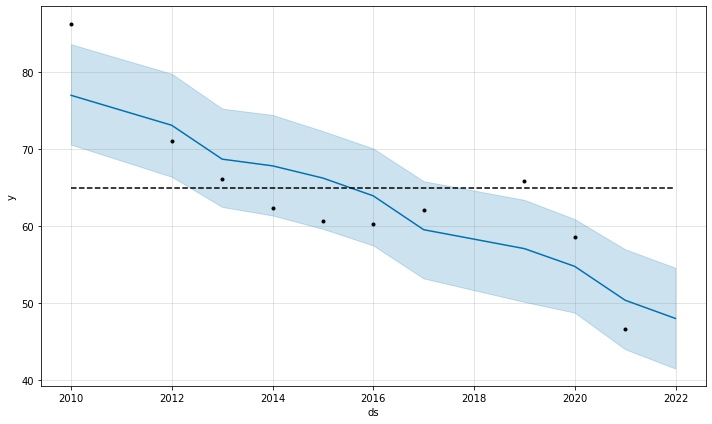

In [193]:
tuned_prophetModel = Prophet(changepoint_prior_scale=0.001)
tuned_prophetModel.fit(yearlyTimeSeriesDf)
#fig = m.plot(forecast)

future = tuned_prophetModel.make_future_dataframe(periods = 1, freq = 'Y')
future['cap'] = cap
fcst = tuned_prophetModel.predict(future)
fig = tuned_prophetModel.plot(fcst)


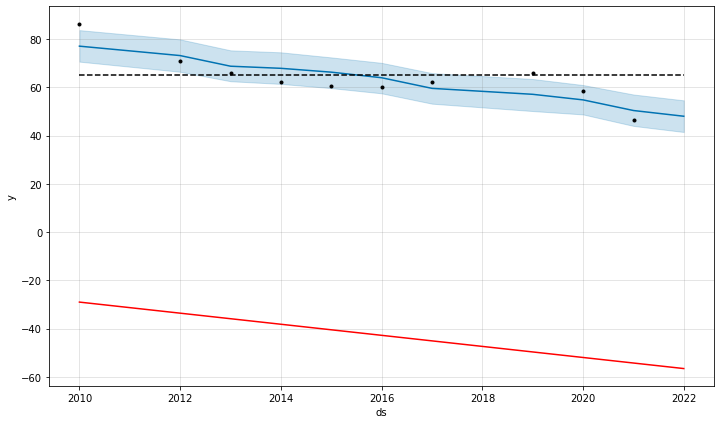

In [231]:
fig = tuned_prophetModel.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), tuned_prophetModel, fcst)

Cross Validation
Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [ ]:
#yearly_ES = cross_validation(prophetModel, initial='970 days',period='135 days', horizon='365 days', parallel = 'processes')
#yearly_ES.head()
#yearly_pm = performance_metrics(yearly_ES)
#yearly_pm.head()
#r2_mn = r2_score(yearly_ES['y'],yearly_ES['yhat'])
#r2_mn

INFO:fbprophet:Making 16 forecasts with cutoffs between 2012-09-04 00:00:00 and 2020-01-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fa7ee7748d0>
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepo

In [184]:
# Merge dataframes to get y in the matrix

forecastOneYear =  forecastOneYear.merge(yearlyTimeSeriesDf, on= 'ds')
forecastTenYear = forecastTenYear.merge(yearlyTimeSeriesDf, on= 'ds')
forecastTwentyYear = forecastTwentyYear.merge(yearlyTimeSeriesDf, on= 'ds')

fcst_OneYear = fcst_OneYear.merge(yearlyTimeSeriesDf, on= 'ds')
fcst_TenYears = fcst_TenYears.merge(yearlyTimeSeriesDf, on= 'ds')
fcst_TwentyYears = fcst_TwentyYears.merge(yearlyTimeSeriesDf, on= 'ds')



In [185]:
# checking one year performance without parameter tuning

print('Mean absolute percentage error for one year forecasting:', mean_absolute_percentage_error(forecastOneMonth.y, forecastOneMonth.yhat))
print('Mean absolute error for one year forecasting:           ', mean_absolute_error(forecastOneMonth.y, forecastOneMonth.yhat))
print('R2 score for one year forecasting:                      ', r2_score(forecastOneMonth.y, forecastOneMonth.yhat))



Mean absolute percentage error for one year forecasting: 0.06810392846745533
Mean absolute error for one year forecasting:            5.027691591954126
R2 score for one year forecasting:                       0.6642014395955875


In [187]:
# checking one year performance with parameter tuning

print('Mean absolute percentage error for one year forecasting:', mean_absolute_percentage_error(fcst_OneYear.y, fcst_OneYear.yhat))
print('Mean absolute error for one year forecasting:           ', mean_absolute_error(fcst_OneYear.y, fcst_OneYear.yhat))
print('R2 score for one year forecasting:                      ', r2_score(fcst_OneYear.y, fcst_OneYear.yhat))

Mean absolute percentage error for one year forecasting: 0.03642659149500429
Mean absolute error for one year forecasting:            2.5012372929229842
R2 score for one year forecasting:                       0.8604296077455287


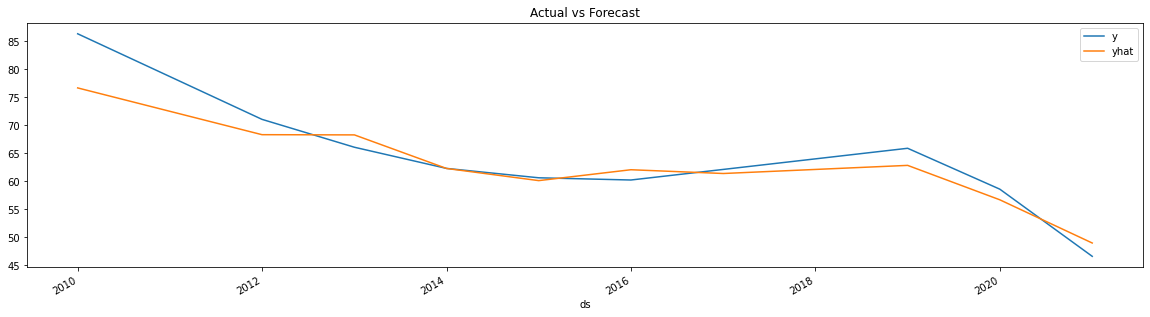

In [188]:
# plotting the actual and forecast values - 1year

ax = (yearlyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_OneYear.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)


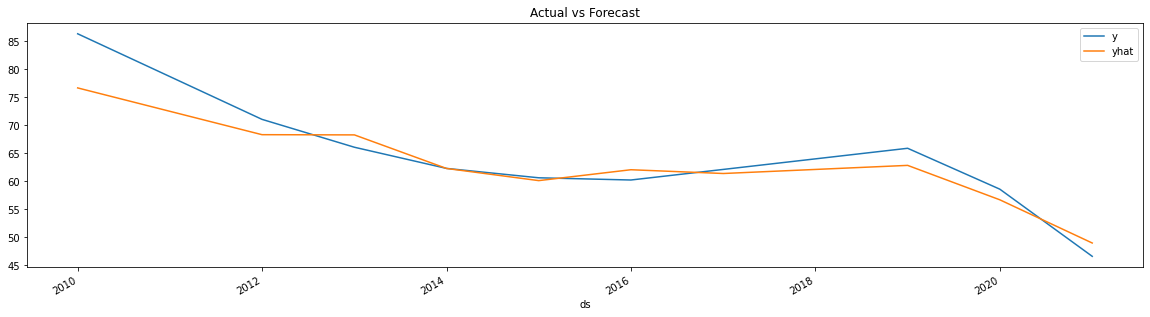

In [189]:
# plotting the actual and forecast values - 10 years

ax = (yearlyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_TenYears.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

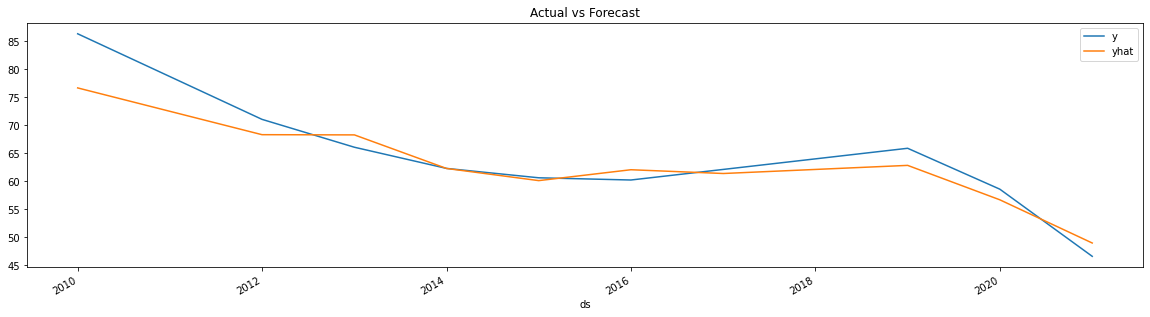

In [190]:
# plotting the actual and forecast values - 20 years

ax = (yearlyTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
fcst_TwentyYears.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

**Conclusion**:

Out of all the above model - model for 1 year forecasting with tuned parameter has good results with 

R2 score for one year forecasting: 0.8604296077455287

Parameters used:

tuned_prophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints=10,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_prophetModel.add_seasonality(name= 'yearly', period=30.5, fourier_order=5, prior_scale=0.02)
yearlyTimeSeriesDf['cap'] = 75


### Predict Electric Consumption for each of the 5 Boroughs (independently)!`



In [232]:
#Lets get the distint boroughs
df['Borough'].value_counts()

BROOKLYN                    138238
MANHATTAN                    93082
BRONX                        82782
QUEENS                       42449
STATEN ISLAND                 2776
NON DEVELOPMENT FACILITY      1940
FHA                           1363
Name: Borough, dtype: int64

In [233]:
# create separate datasets for each borough

brooklynDf = df[df['Borough'] == 'BROOKLYN']
manhattanDf = df[df['Borough'] == 'MANHATTAN']
bronxDf = df[df['Borough'] == 'BRONX']
queensDf = df[df['Borough'] == 'QUEENS']
statenislandDf = df[df['Borough'] == 'STATEN ISLAND']


BROOKLYN

In [234]:
yearlyBrooklynTimeSeriesDf = brooklynDf[['Revenue Month', 'Consumption (KW)']]
yearlyBrooklynTimeSeriesDf

,Revenue Month,Consumption (KW)
84,2010-01,30.00
85,2010-01,0.00
86,2010-01,0.00
87,2010-01,0.00
88,2010-01,0.00
...,...,...
362625,2021-02,109.44
362626,2021-02,141.24
362627,2021-02,0.00
362628,2021-02,0.00


In [235]:
# Get yearly mean data
yearlyBrooklynTimeSeriesDf = yearlyBrooklynTimeSeriesDf.groupby(pd.PeriodIndex(yearlyBrooklynTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [236]:
# Generate date for the years
yearlyBrooklynTimeSeriesDf['Revenue Month'] = yearlyBrooklynTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [237]:
yearlyBrooklynTimeSeriesDf.columns = ['ds', 'y']
yearlyBrooklynTimeSeriesDf.head()

,ds,y
0,2010-01-01,72.887724
1,2012-01-01,65.093210
2,2013-01-01,58.927172
3,2014-01-01,52.054393
4,2015-01-01,48.901562


In [238]:
# Check for null values
yearlyBrooklynTimeSeriesDf.columns[yearlyBrooklynTimeSeriesDf.isnull().any()]


Index([], dtype='object')

**FaceBook Prophet Model for Yearly data**


In [240]:
# Instantiate prophet model
brookprophetModel = Prophet()
brookprophetModel = brookprophetModel.fit(yearlyBrooklynTimeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [242]:
# Predicting values for future 10 year

futureBrookTenYear = brookprophetModel.make_future_dataframe(10, freq = 'Y')
forecastBrookTenYear = brookprophetModel.predict(futureBrookTenYear)
forecastBrookTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
15,2026-12-31,27.688092,23.309604,31.989409
16,2027-12-31,27.263021,22.901690,31.400453
17,2028-12-31,19.213290,15.085868,23.433285
18,2029-12-31,17.986938,13.529530,22.488993
19,2030-12-31,17.162775,12.797802,21.484191


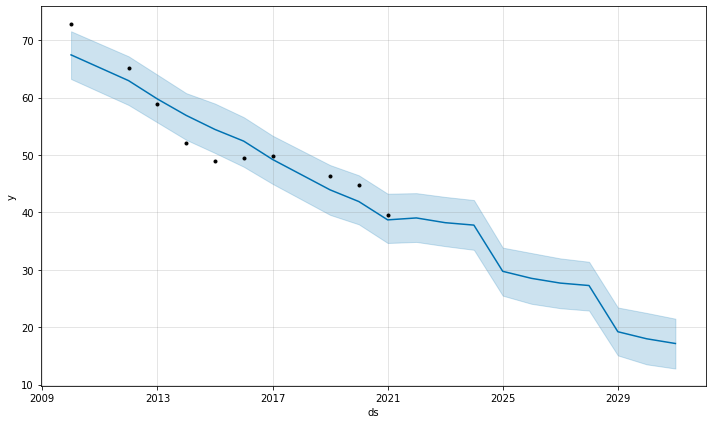

In [243]:
fig = brookprophetModel.plot(forecastBrookTenYear)

Tune your FBProphet model on the following parameters:
* Forecasting growth:
* Seasonality:
* Trend Changepoints:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



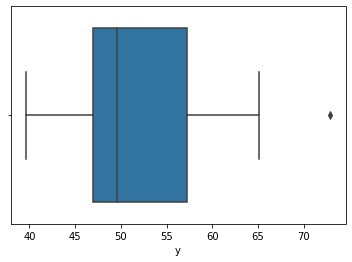

In [244]:
# Getting outliers to decide cap value

sns.boxplot(yearlyBrooklynTimeSeriesDf['y'])
plt.show()

In [245]:
cap = 57

In [246]:
tuned_brookprophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints= 5,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_brookprophetModel.add_seasonality(name= 'yearly', period=30.5, fourier_order=5, prior_scale=0.02)
yearlyBrooklynTimeSeriesDf['cap'] = cap


In [247]:
tuned_brookprophetModel.fit(yearlyBrooklynTimeSeriesDf)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [248]:
futureBrookTenYearsTuned = tuned_brookprophetModel.make_future_dataframe(periods = 10, freq = 'Y')
futureBrookTenYearsTuned['cap'] = cap
fcst_brookTenYears = tuned_prophetModel.predict(futureBrookTenYearsTuned)
fcst_brookTenYears.tail()


,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2026-12-31,-67.986970,57,27.361977,40.445821,-67.986971,-67.986969,102.330496,102.330496,102.330496,102.330496,102.330496,102.330496,0.0,0.0,0.0,34.343526
16,2027-12-31,-70.279669,57,22.665141,35.597809,-70.279670,-70.279668,99.452158,99.452158,99.452158,99.452158,99.452158,99.452158,0.0,0.0,0.0,29.172489
17,2028-12-31,-72.578649,57,26.646795,39.927918,-72.578650,-72.578648,105.951141,105.951141,105.951141,105.951141,105.951141,105.951141,0.0,0.0,0.0,33.372492
18,2029-12-31,-74.871348,57,22.959391,35.676778,-74.871349,-74.871346,104.498176,104.498176,104.498176,104.498176,104.498176,104.498176,0.0,0.0,0.0,29.626828
19,2030-12-31,-77.164047,57,18.703921,31.694948,-77.164048,-77.164045,102.330496,102.330496,102.330496,102.330496,102.330496,102.330496,0.0,0.0,0.0,25.166450


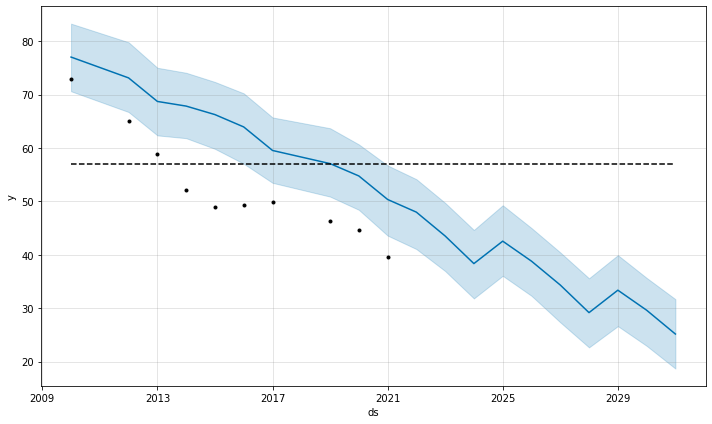

In [249]:

fig = tuned_brookprophetModel.plot(fcst_brookTenYears)

Cross Validation Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [260]:
# Merge dataframes to get y in the matrix

forecastBrookTenYear =  forecastBrookTenYear.merge(yearlyBrooklynTimeSeriesDf, on= 'ds')
fcst_brookTenYears =  fcst_brookTenYears.merge(yearlyBrooklynTimeSeriesDf, on= 'ds')
fcst_brookTenYears

,ds,trend,cap_x,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_x,cap_y,y_y,cap_x,y_x,cap_y,y_y,cap_x,y,cap_y
0,2010-01-01,-28.992246,57,70.608955,83.263218,-28.992246,-28.992246,105.999531,105.999531,105.999531,105.999531,105.999531,105.999531,0.0,0.0,0.0,77.007285,72.887724,57,72.887724,57,72.887724,57,72.887724,57,72.887724,57
1,2012-01-01,-33.577644,57,66.723954,79.778135,-33.577644,-33.577644,106.686557,106.686557,106.686557,106.686557,106.686557,106.686557,0.0,0.0,0.0,73.108914,65.093210,57,65.093210,57,65.093210,57,65.093210,57,65.093210,57
2,2013-01-01,-35.876624,57,62.348998,75.003206,-35.876624,-35.876624,104.577550,104.577550,104.577550,104.577550,104.577550,104.577550,0.0,0.0,0.0,68.700926,58.927172,57,58.927172,57,58.927172,57,58.927172,57,58.927172,57
3,2014-01-01,-38.169323,57,61.824537,74.066608,-38.169323,-38.169323,105.999531,105.999531,105.999531,105.999531,105.999531,105.999531,0.0,0.0,0.0,67.830208,52.054393,57,52.054393,57,52.054393,57,52.054393,57,52.054393,57
4,2015-01-01,-40.462022,57,59.832497,72.349419,-40.462022,-40.462022,106.702815,106.702815,106.702815,106.702815,106.702815,106.702815,0.0,0.0,0.0,66.240793,48.901562,57,48.901562,57,48.901562,57,48.901562,57,48.901562,57
5,2016-01-01,-42.754720,57,57.051871,70.221549,-42.754720,-42.754720,106.686557,106.686557,106.686557,106.686557,106.686557,106.686557,0.0,0.0,0.0,63.931837,49.400051,57,49.400051,57,49.400051,57,49.400051,57,49.400051,57
6,2017-01-01,-45.053701,57,53.466398,65.706894,-45.053701,-45.053701,104.577550,104.577550,104.577550,104.577550,104.577550,104.577550,0.0,0.0,0.0,59.523849,49.819515,57,49.819515,57,49.819515,57,49.819515,57,49.819515,57
7,2019-01-01,-49.639098,57,50.890528,63.688951,-49.639098,-49.639098,106.702815,106.702815,106.702815,106.702815,106.702815,106.702815,0.0,0.0,0.0,57.063717,46.301384,57,46.301384,57,46.301384,57,46.301384,57,46.301384,57
8,2020-01-01,-51.931797,57,48.416110,60.660884,-51.931797,-51.931797,106.686557,106.686557,106.686557,106.686557,106.686557,106.686557,0.0,0.0,0.0,54.754760,44.710659,57,44.710659,57,44.710659,57,44.710659,57,44.710659,57
9,2021-01-01,-54.230777,57,43.589346,56.713544,-54.230777,-54.230777,104.577550,104.577550,104.577550,104.577550,104.577550,104.577550,0.0,0.0,0.0,50.346773,39.616769,57,39.616769,57,39.616769,57,39.616769,57,39.616769,57


In [258]:
# checking ten year performance without parameter tuning

print('Mean absolute percentage error for ten year forecasting:', mean_absolute_percentage_error(forecastBrookTenYear.y, forecastBrookTenYear.yhat))
print('Mean absolute error for ten year forecasting:           ', mean_absolute_error(forecastBrookTenYear.y, forecastBrookTenYear.yhat))
print('R2 score for one ten forecasting:                       ', r2_score(forecastBrookTenYear.y, forecastBrookTenYear.yhat))


Mean absolute percentage error for ten year forecasting: 0.05386546444345689
Mean absolute error for ten year forecasting:            2.852803223916852
R2 score for one ten forecasting:                        0.8756930772884494


In [261]:
# checking ten year performance with parameter tuning

print('Mean absolute percentage error for ten year forecasting:', mean_absolute_percentage_error(fcst_brookTenYears.y, fcst_brookTenYears.yhat))
print('Mean absolute error for ten year forecasting:           ', mean_absolute_error(fcst_brookTenYears.y, fcst_brookTenYears.yhat))
print('R2 score for one ten forecasting:                       ', r2_score(fcst_brookTenYears.y, fcst_brookTenYears.yhat))


Mean absolute percentage error for ten year forecasting: 0.22200487428626423
Mean absolute error for ten year forecasting:            11.079662184966939
R2 score for one ten forecasting:                        -0.4985815347814291


MANHATTAN

In [263]:
yearlyManhattanTimeSeriesDf = manhattanDf[['Revenue Month', 'Consumption (KW)']]
yearlyManhattanTimeSeriesDf

,Revenue Month,Consumption (KW)
204,2010-01,220.00
205,2010-02,208.00
206,2010-03,176.00
207,2010-04,152.00
208,2010-05,184.00
...,...,...
361953,2020-12,0.00
361954,2021-01,446.88
361955,2021-01,0.00
361956,2021-02,434.40


In [264]:
# Get yearly mean data
yearlyManhattanTimeSeriesDf = yearlyManhattanTimeSeriesDf.groupby(pd.PeriodIndex(yearlyManhattanTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [265]:
# Generate date for the years
yearlyManhattanTimeSeriesDf['Revenue Month'] = yearlyManhattanTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [266]:
yearlyManhattanTimeSeriesDf.columns = ['ds', 'y']
yearlyManhattanTimeSeriesDf.head()

,ds,y
0,2010-01-01,97.185643
1,2012-01-01,75.322604
2,2013-01-01,70.314918
3,2014-01-01,67.605691
4,2015-01-01,68.905718


In [267]:
# Check for null values
yearlyManhattanTimeSeriesDf.columns[yearlyManhattanTimeSeriesDf.isnull().any()]


Index([], dtype='object')

**FaceBook Prophet Model for Yearly data**

In [268]:
# Instantiate prophet model
manhattanProphetModel = Prophet()
manhattanProphetModel = manhattanProphetModel.fit(yearlyManhattanTimeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [270]:
# Predicting values for future 10 year

futureManhattanTenYear = manhattanProphetModel.make_future_dataframe(10, freq = 'Y')
forecastManhattanTenYear = manhattanProphetModel.predict(futureManhattanTenYear)
forecastManhattanTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2026-12-31,36.001893,27.999790,43.571909
16,2027-12-31,30.658605,22.554415,38.226595
17,2028-12-31,34.608487,26.341201,42.448782
18,2029-12-31,30.395554,22.984562,38.419922
19,2030-12-31,25.615557,17.281097,33.913428


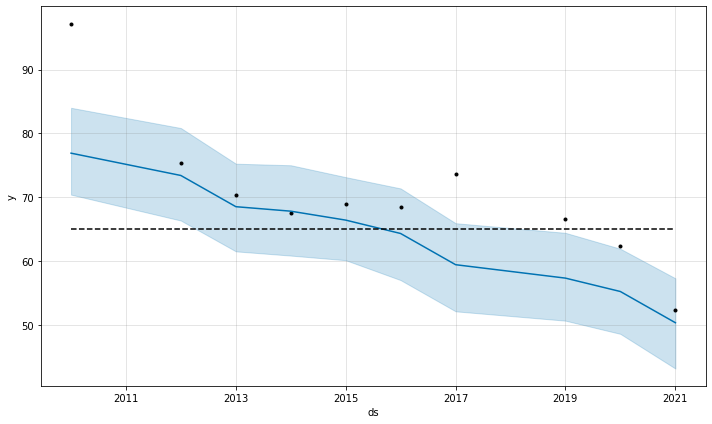

In [272]:
#plot the model forecast chart 

fig = manhattanProphetModel.plot(forecastOneYear)

Tune your FBProphet model on the following parameters:
* Forecasting growth:
* Seasonality:
* Trend Changepoints:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



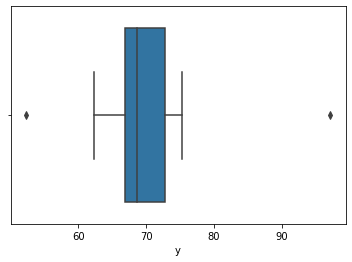

In [273]:
# Getting outliers to decide cap value

sns.boxplot(yearlyManhattanTimeSeriesDf['y'])
plt.show()


In [274]:
cap = 72

In [275]:
tuned_manhattanprophetModel = Prophet(growth='logistic',
            interval_width = 0.8,
            n_changepoints=10,
            changepoint_range=0.8,
            changepoint_prior_scale=1,
            seasonality_mode='additive')
tuned_manhattanprophetModel.add_seasonality(name= 'yearly', period=30.5, fourier_order=5, prior_scale=0.02)
yearlyManhattanTimeSeriesDf['cap'] = cap



In [276]:
tuned_manhattanprophetModel.fit(yearlyManhattanTimeSeriesDf)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [277]:
futureManhattanTenYearsTuned = tuned_manhattanprophetModel.make_future_dataframe(periods = 10, freq = 'Y')
futureManhattanTenYearsTuned['cap'] = cap
fcst_manhattanTenYears = tuned_manhattanprophetModel.predict(futureManhattanTenYearsTuned)
fcst_manhattanTenYears.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2026-12-31,10.937580,72,1.749964,16.470490,10.937579,10.937580,-1.465037,-1.465037,-1.465037,-1.465037,-1.465037,-1.465037,0.0,0.0,0.0,9.472542
16,2027-12-31,7.113633,72,-1.987558,11.643573,7.113633,7.113634,-2.422213,-2.422213,-2.422213,-2.422213,-2.422213,-2.422213,0.0,0.0,0.0,4.691420
17,2028-12-31,4.521769,72,-4.690724,8.991880,4.521768,4.521769,-2.422213,-2.422213,-2.422213,-2.422213,-2.422213,-2.422213,0.0,0.0,0.0,2.099556
18,2029-12-31,2.836686,72,-5.995051,7.789808,2.836686,2.836686,-1.865107,-1.865107,-1.865107,-1.865107,-1.865107,-1.865107,0.0,0.0,0.0,0.971579
19,2030-12-31,1.763158,72,-5.921001,8.217850,1.763158,1.763158,-0.443719,-0.443719,-0.443719,-0.443719,-0.443719,-0.443719,0.0,0.0,0.0,1.319439


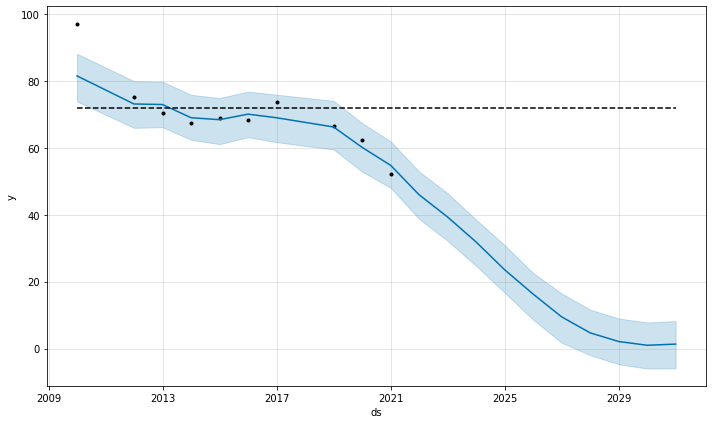

In [278]:
fig = tuned_manhattanprophetModel.plot(fcst_manhattanTenYears)

Cross Validation Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [289]:

# Merge dataframes to get y in the matrix

forecastManhattanTenYear =  forecastManhattanTenYear.merge(yearlyManhattanTimeSeriesDf, on= 'ds')
fcst_manhattanTenYears =  fcst_manhattanTenYears.merge(yearlyManhattanTimeSeriesDf, on= 'ds')

#forecastManhattanTenYear

,ds,trend,cap_x,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_x,cap_y,y_y,cap_x,y_x,cap_y,y_y,cap_x,y_x,cap_y,y_y,cap_x,y,cap_y
0,2010-01-01,71.905092,72,73.899504,88.185043,71.905092,71.905092,9.650632,9.650632,9.650632,9.650632,9.650632,9.650632,0.0,0.0,0.0,81.555724,97.185643,72,97.185643,72,97.185643,72,97.185643,72,97.185643,72,97.185643,72,97.185643,72
1,2012-01-01,71.747206,72,66.013357,79.974059,71.747206,71.747206,1.405896,1.405896,1.405896,1.405896,1.405896,1.405896,0.0,0.0,0.0,73.153102,75.322604,72,75.322604,72,75.322604,72,75.322604,72,75.322604,72,75.322604,72,75.322604,72
2,2013-01-01,71.587340,72,66.218654,79.831304,71.587340,71.587340,1.405896,1.405896,1.405896,1.405896,1.405896,1.405896,0.0,0.0,0.0,72.993237,70.314918,72,70.314918,72,70.314918,72,70.314918,72,70.314918,72,70.314918,72,70.314918,72
3,2014-01-01,71.328221,72,62.442096,75.890701,71.328221,71.328221,-2.289405,-2.289405,-2.289405,-2.289405,-2.289405,-2.289405,0.0,0.0,0.0,69.038817,67.605691,72,67.605691,72,67.605691,72,67.605691,72,67.605691,72,67.605691,72,67.605691,72
4,2015-01-01,70.908875,72,61.135957,74.949912,70.908875,70.908875,-2.445555,-2.445555,-2.445555,-2.445555,-2.445555,-2.445555,0.0,0.0,0.0,68.463320,68.905718,72,68.905718,72,68.905718,72,68.905718,72,68.905718,72,68.905718,72,68.905718,72
5,2016-01-01,70.234238,72,63.206184,76.846696,70.234238,70.234238,-0.124797,-0.124797,-0.124797,-0.124797,-0.124797,-0.124797,0.0,0.0,0.0,70.109441,68.470788,72,68.470788,72,68.470788,72,68.470788,72,68.470788,72,68.470788,72,68.470788,72
6,2017-01-01,69.155516,72,61.713499,75.939322,69.155516,69.155516,-0.124797,-0.124797,-0.124797,-0.124797,-0.124797,-0.124797,0.0,0.0,0.0,69.030719,73.673756,72,73.673756,72,73.673756,72,73.673756,72,73.673756,72,73.673756,72,73.673756,72
7,2019-01-01,64.876663,72,59.552426,74.082057,64.876663,64.876663,1.391830,1.391830,1.391830,1.391830,1.391830,1.391830,0.0,0.0,0.0,66.268493,66.587023,72,66.587023,72,66.587023,72,66.587023,72,66.587023,72,66.587023,72,66.587023,72
8,2020-01-01,61.048380,72,52.928168,67.455342,61.048380,61.048380,-0.864239,-0.864239,-0.864239,-0.864239,-0.864239,-0.864239,0.0,0.0,0.0,60.184141,62.312522,72,62.312522,72,62.312522,72,62.312522,72,62.312522,72,62.312522,72,62.312522,72
9,2021-01-01,55.663237,72,48.072399,61.947738,55.663237,55.663237,-0.864239,-0.864239,-0.864239,-0.864239,-0.864239,-0.864239,0.0,0.0,0.0,54.798998,52.278138,72,52.278138,72,52.278138,72,52.278138,72,52.278138,72,52.278138,72,52.278138,72


In [286]:
# checking 10 year performance without parameter tuning

print('Mean absolute percentage error for ten year forecasting:', mean_absolute_percentage_error(forecastManhattanTenYear.y, forecastManhattanTenYear.yhat))
print('Mean absolute error for ten year forecasting:           ', mean_absolute_error(forecastManhattanTenYear.y, forecastManhattanTenYear.yhat))
print('R2 score for ten year forecasting:                      ', r2_score(forecastManhattanTenYear.y, forecastManhattanTenYear.yhat))


Mean absolute percentage error for ten year forecasting: 0.07405484818461587
Mean absolute error for ten year forecasting:            5.356479904577305
R2 score for ten year forecasting:                       0.6864329730035812


In [290]:
# checking 10 year performance with parameter tuning

print('Mean absolute percentage error for ten year forecasting:', mean_absolute_percentage_error(fcst_manhattanTenYears.y, fcst_manhattanTenYears.yhat))
print('Mean absolute error for ten year forecasting:           ', mean_absolute_error(fcst_manhattanTenYears.y, fcst_manhattanTenYears.yhat))
print('R2 score for ten year forecasting:                      ', r2_score(fcst_manhattanTenYears.y, fcst_manhattanTenYears.yhat))


Mean absolute percentage error for ten year forecasting: 0.04294512613687536
Mean absolute error for ten year forecasting:            3.3602723815518196
R2 score for ten year forecasting:                       0.7499456983181135


BRONX

In [291]:
yearlyBronxTimeSeriesDf = bronxDf[['Revenue Month', 'Consumption (KW)']]
yearlyBronxTimeSeriesDf

,Revenue Month,Consumption (KW)
0,2010-01,216.0
1,2010-02,224.0
2,2010-03,216.0
3,2010-04,208.0
4,2010-05,216.0
...,...,...
360343,2020-10,120.0
360344,2020-11,184.0
360345,2020-12,192.0
360346,2021-01,176.0


In [292]:
# Get yearly mean data
yearlyBronxTimeSeriesDf = yearlyBronxTimeSeriesDf.groupby(pd.PeriodIndex(yearlyBronxTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [293]:
# Generate date for the years
yearlyBronxTimeSeriesDf['Revenue Month'] = yearlyBronxTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [294]:
yearlyBronxTimeSeriesDf.columns = ['ds', 'y']
yearlyBronxTimeSeriesDf.head()


,ds,y
0,2010-01-01,97.469511
1,2012-01-01,78.706881
2,2013-01-01,72.112056
3,2014-01-01,70.544117
4,2015-01-01,70.182889


**FaceBook Prophet Model for Yearly data**

In [295]:
# Instantiate prophet model
bronxprophetModel = Prophet()
bronxprophetModel = bronxprophetModel.fit(yearlyBronxTimeSeriesDf)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [296]:
# Predicting values for future 10 year

futurebronxTenYear = bronxprophetModel.make_future_dataframe(10, freq = 'Y')
forecastbronxTenYear = bronxprophetModel.predict(futurebronxTenYear)
forecastbronxTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2026-12-31,59.050552,49.284629,68.326918
16,2027-12-31,58.622970,49.068453,68.067106
17,2028-12-31,51.192569,41.100317,61.199040
18,2029-12-31,51.045385,42.076617,60.405561
19,2030-12-31,50.758969,41.124876,59.645127


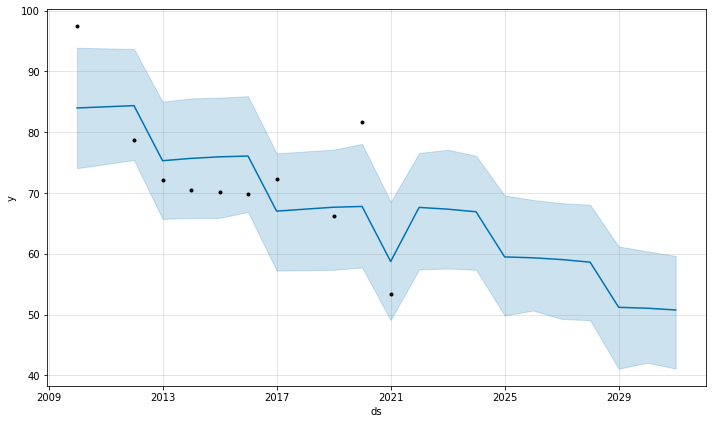

In [297]:
fig = bronxprophetModel.plot(forecastbronxTenYear)

Cross Validation Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [298]:
forecastbronxTenYear =  forecastbronxTenYear.merge(yearlyBronxTimeSeriesDf, on= 'ds')

In [299]:
# checking ten year performance without parameter tuning

print('Mean absolute percentage error for ten year forecasting:', mean_absolute_percentage_error(forecastbronxTenYear.y, forecastbronxTenYear.yhat))
print('Mean absolute error for ten year forecasting:           ', mean_absolute_error(forecastbronxTenYear.y, forecastbronxTenYear.yhat))
print('R2 score for ten year forecasting:                      ', r2_score(forecastbronxTenYear.y, forecastbronxTenYear.yhat))


Mean absolute percentage error for ten year forecasting: 0.08630955466501672
Mean absolute error for ten year forecasting:            6.534283482882239
R2 score for ten year forecasting:                       0.5074999069125488


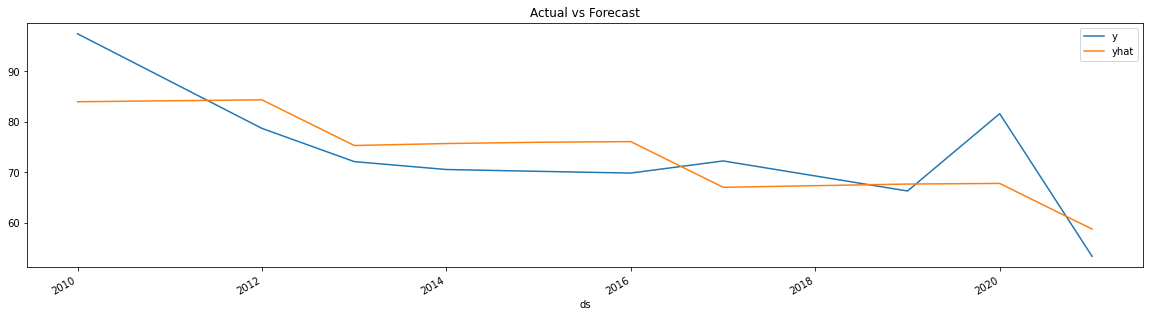

In [300]:
# plotting the actual and forecast values - 1year

ax = (yearlyBronxTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecastbronxTenYear.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

QUEENS

In [301]:
yearlyQueensTimeSeriesDf = queensDf[['Revenue Month', 'Consumption (KW)']]
yearlyQueensTimeSeriesDf

,Revenue Month,Consumption (KW)
594,2010-01,1317.00
595,2010-01,0.00
596,2010-01,0.00
597,2010-01,0.00
598,2010-01,0.00
...,...,...
362513,2021-02,0.00
362514,2021-02,0.00
362515,2021-02,0.00
362516,2021-02,59.52


In [302]:
# Get yearly mean data
yearlyQueensTimeSeriesDf = yearlyQueensTimeSeriesDf.groupby(pd.PeriodIndex(yearlyQueensTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [303]:
# Generate date for the years
yearlyQueensTimeSeriesDf['Revenue Month'] = yearlyQueensTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [304]:
yearlyQueensTimeSeriesDf.columns = ['ds', 'y']
yearlyQueensTimeSeriesDf.head()

,ds,y
0,2010-01-01,62.432687
1,2012-01-01,44.764991
2,2013-01-01,50.359497
3,2014-01-01,50.410635
4,2015-01-01,53.938139


**FaceBook Prophet Model for Yearly data**

In [305]:
# Instantiate prophet model
queensprophetModel = Prophet()
queensprophetModel = queensprophetModel.fit(yearlyQueensTimeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [306]:
# Predicting values for future 10 year

futureQueensTenYear = queensprophetModel.make_future_dataframe(10, freq = 'Y')
forecastQueensTenYear = queensprophetModel.predict(futureQueensTenYear)
forecastQueensTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2026-12-31,23.291674,16.726121,30.181247
16,2027-12-31,18.481285,12.062108,25.474843
17,2028-12-31,24.572935,17.507727,31.974206
18,2029-12-31,20.897487,13.797885,27.504884
19,2030-12-31,16.652443,10.156691,23.735732


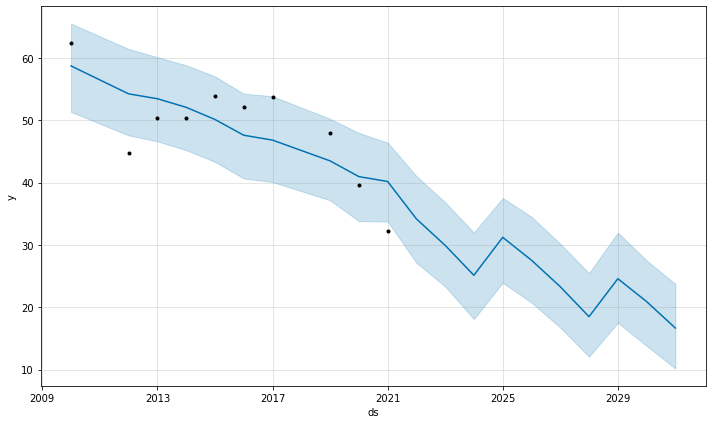

In [307]:
fig = queensprophetModel.plot(forecastQueensTenYear)

Cross Validation Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [309]:
# Merge dataframes to get y in the matrix

forecastQueensTenYear =  forecastQueensTenYear.merge(yearlyQueensTimeSeriesDf, on= 'ds')


In [313]:
# checking ten year performance without parameter tuning

print('Mean absolute percentage error for ten years forecasting:', mean_absolute_percentage_error(forecastQueensTenYear.y_y, forecastQueensTenYear.yhat))
print('Mean absolute error for ten years forecasting:           ', mean_absolute_error(forecastQueensTenYear.y_y, forecastQueensTenYear.yhat))
print('R2 score for ten years forecasting:                      ', r2_score(forecastQueensTenYear.y_y, forecastQueensTenYear.yhat))


Mean absolute percentage error for ten years forecasting: 0.10232117219614607
Mean absolute error for ten years forecasting:            4.685809068406883
R2 score for ten years forecasting:                       0.5485403661180415


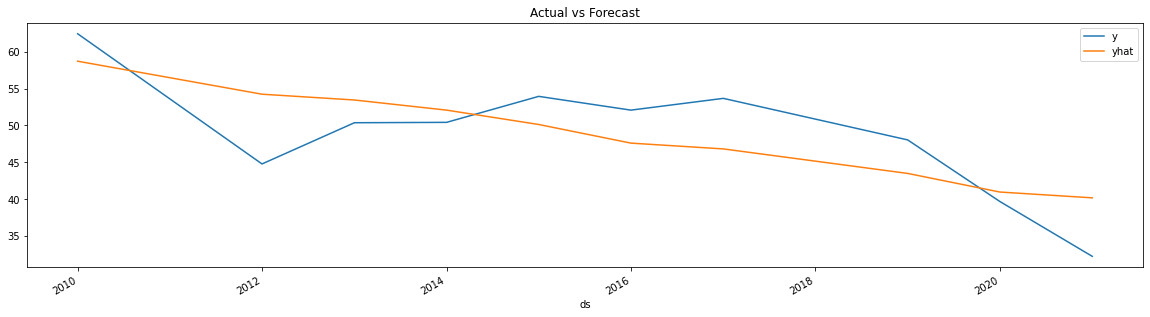

In [315]:
# plotting the actual and forecast values - 10 years

ax = (yearlyQueensTimeSeriesDf.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecastQueensTenYear.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

STATEN ISLAND 

In [316]:
yearlystatenTimeSeriesDf = statenislandDf[['Revenue Month', 'Consumption (KW)']]
yearlystatenTimeSeriesDf

,Revenue Month,Consumption (KW)
1419,2010-09,0.00
1458,2010-01,0.00
1459,2010-01,496.00
1460,2010-02,0.00
1461,2010-03,0.00
...,...,...
360161,2021-01,0.00
360162,2021-02,522.80
360163,2021-02,0.00
360164,2021-02,72.64


In [317]:
# Get yearly mean data

yearlystatenTimeSeriesDf = yearlystatenTimeSeriesDf.groupby(pd.PeriodIndex(yearlystatenTimeSeriesDf['Revenue Month'], freq = 'Y'))['Consumption (KW)'].mean().reset_index()


In [318]:
# Generate date for the years

yearlystatenTimeSeriesDf['Revenue Month'] = yearlystatenTimeSeriesDf['Revenue Month'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))


In [319]:
yearlystatenTimeSeriesDf.columns = ['ds', 'y']
yearlystatenTimeSeriesDf.head()

,ds,y
0,2010-01-01,250.197296
1,2012-01-01,272.087153
2,2013-01-01,221.426354
3,2014-01-01,234.991771
4,2015-01-01,228.255302


**FaceBook Prophet Model for Yearly data**

In [320]:
# Instantiate prophet model
statenprophetModel = Prophet()
statenprophetModel = statenprophetModel.fit(yearlystatenTimeSeriesDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [322]:
# Predicting values for future 10 year

futurestatenTenYear = statenprophetModel.make_future_dataframe(10, freq = 'Y')
forecaststatenTenYear = statenprophetModel.predict(futurestatenTenYear)
forecaststatenTenYear[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2026-12-31,738.803843,344.605938,1118.113834
16,2027-12-31,776.671078,396.694932,1142.077419
17,2028-12-31,742.426046,359.076486,1118.630830
18,2029-12-31,791.546675,404.179288,1178.486294
19,2030-12-31,835.046951,439.301829,1241.537271


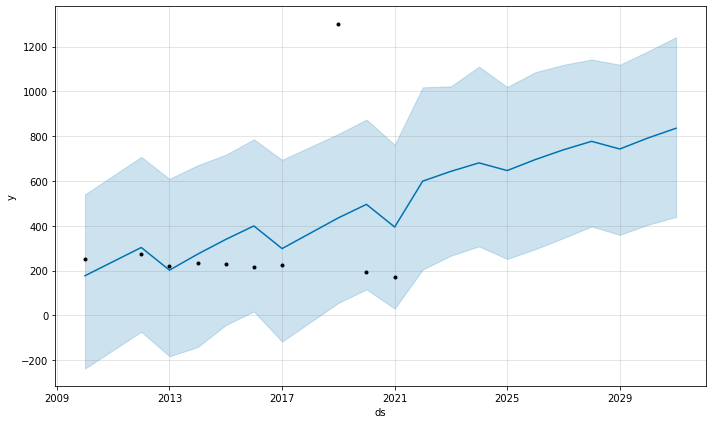

In [323]:
fig = statenprophetModel.plot(forecaststatenTenYear)

Cross Validation Evaluation
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* R^2 (use sklearn’s respective metrics)

In [324]:
# Merge dataframes to get y in the matrix

forecaststatenTenYear =  forecaststatenTenYear.merge(yearlystatenTimeSeriesDf, on= 'ds')

In [328]:
forecaststatenTenYear.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2010-01-01,-245.636786,-237.762940,539.889266,-245.636786,-245.636786,422.278534,422.278534,422.278534,422.278534,422.278534,422.278534,0.0,0.0,0.0,176.641749,250.197296
1,2012-01-01,-197.548169,-73.182378,707.217481,-197.548169,-197.548169,500.283186,500.283186,500.283186,500.283186,500.283186,500.283186,0.0,0.0,0.0,302.735017,272.087153
2,2013-01-01,-173.437986,-182.920238,608.945827,-173.437986,-173.437986,375.041097,375.041097,375.041097,375.041097,375.041097,375.041097,0.0,0.0,0.0,201.603111,221.426354
3,2014-01-01,-149.393678,-142.125640,669.735945,-149.393678,-149.393678,422.278534,422.278534,422.278534,422.278534,422.278534,422.278534,0.0,0.0,0.0,272.884857,234.991771
4,2015-01-01,-125.349370,-43.827418,716.799874,-125.349370,-125.349370,464.042980,464.042980,464.042980,464.042980,464.042980,464.042980,0.0,0.0,0.0,338.693610,228.255302


In [326]:

# checking ten years performance without parameter tuning

print('Mean absolute percentage error for ten years forecasting:', mean_absolute_percentage_error(forecaststatenTenYear.y, forecaststatenTenYear.yhat))
print('Mean absolute error for ten years forecasting:           ', mean_absolute_error(forecaststatenTenYear.y, forecaststatenTenYear.yhat))
print('R2 score for ten years forecasting:                      ', r2_score(forecaststatenTenYear.y, forecaststatenTenYear.yhat))




Mean absolute percentage error for ten years forecasting: 0.5853372797559204
Mean absolute error for ten years forecasting:            192.16146397940932
R2 score for ten years forecasting:                       0.09649907154922077


CONCLUSION

Staten island shows the higher consumprion of electricity in next 10 years